## Census 

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [4]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
#read the data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.shape

(32560, 15)

We see there are 32560 rows and 15 columns in this dataset.

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

We see there are columns which gives the details of each persons like age, workclass, education, marital_status, occupation, relationship, country and their income details. now we ned to predict the census of income.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We see there are 32560 rows and 15 columns in which 6 columns are integer and 9 columns are object which need to be converted to numeric values. There are no null values in each column. We need to predict income which is of categorical type so we will build a classification model. 

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int6

We see there are no null values in the dataset but there is a value "?" in some of the column which need to be replace  by perfect value so first we will convert it to null value then we will use mean, mode or median methods.

In [13]:
df = df.replace(" ?", np.nan)

In [14]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

We see there are nulls in the columns "Workclass", "Occupation" and "Native_country" which are categorical, so we need to treat this nulls with mode method.

In [15]:
df["Workclass"].fillna(df["Workclass"].mode()[0], inplace = True)
df["Occupation"].fillna(df["Occupation"].mode()[0], inplace = True)
df["Native_country"].fillna(df["Native_country"].mode()[0], inplace = True)

In [16]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We see there are no nulls in each column. next we will check with the description of the dataset.

In [17]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We observe that:

    1. All the counts of each column is equal so there are no nulls.
    2. Standard Deviationn is less compared to mean in some of the column the dataset is slightly normal.
    3. Median(50%) is less than the mean in all the columns that means there is right skewness.
    4. There are 0  in min, 25% , 50% and 75% in capital_gain and capital_loss columns.
    5. There are outliers in some of the columns.

In [18]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

#### Data Visualization

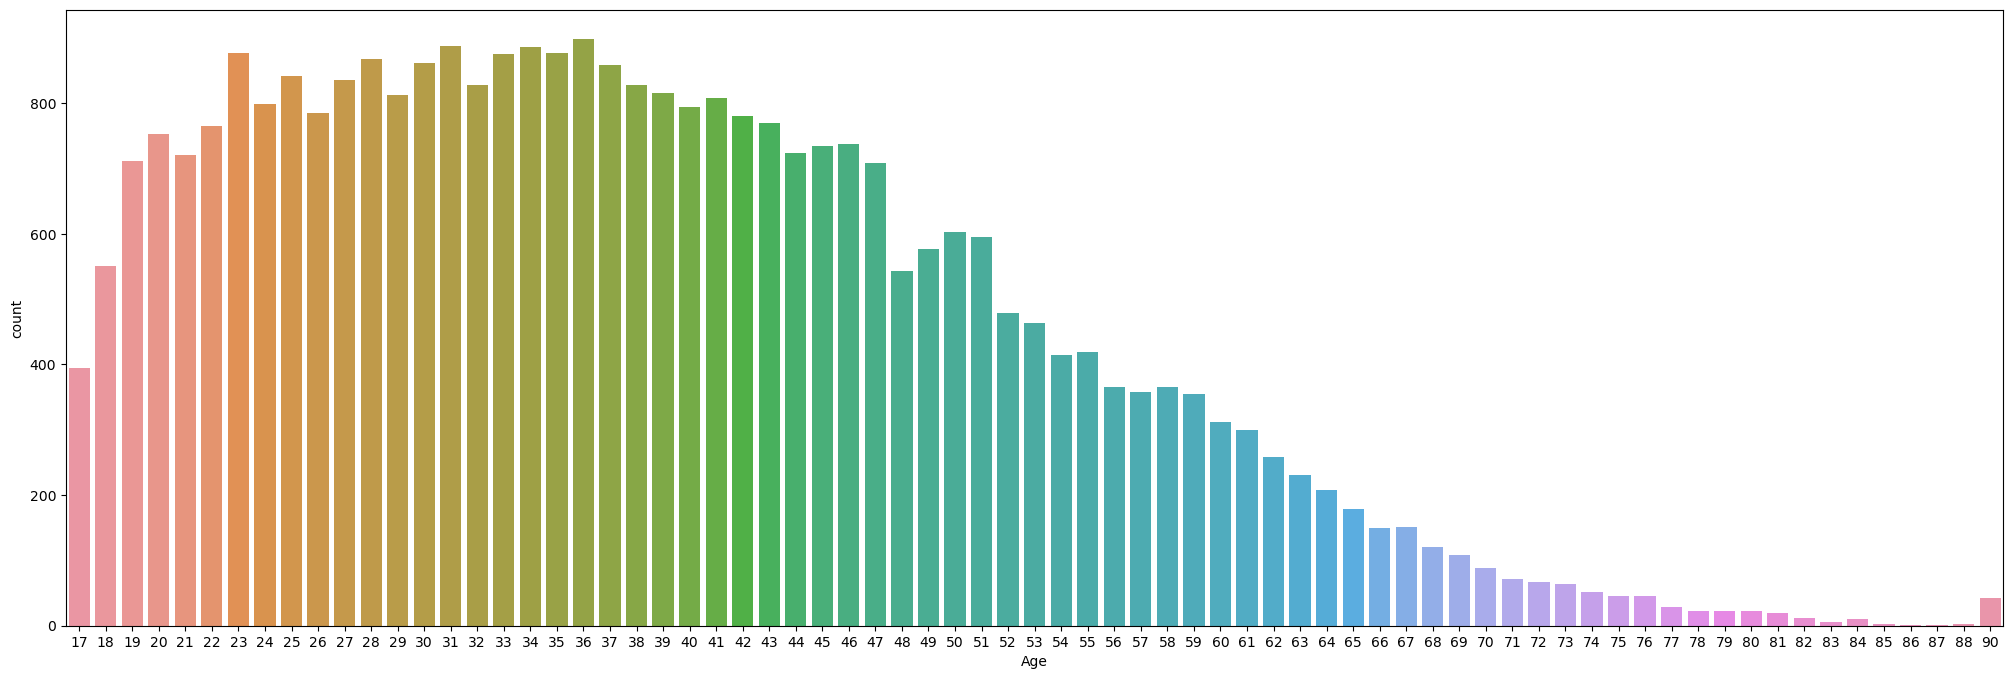

In [19]:
plt.figure(figsize = (25,8))
sns.countplot(df['Age'])
plt.show()

We see there are people at the age of 17 and also at the age 90 they are getting income. People with age 22 and 36 are having highest count.

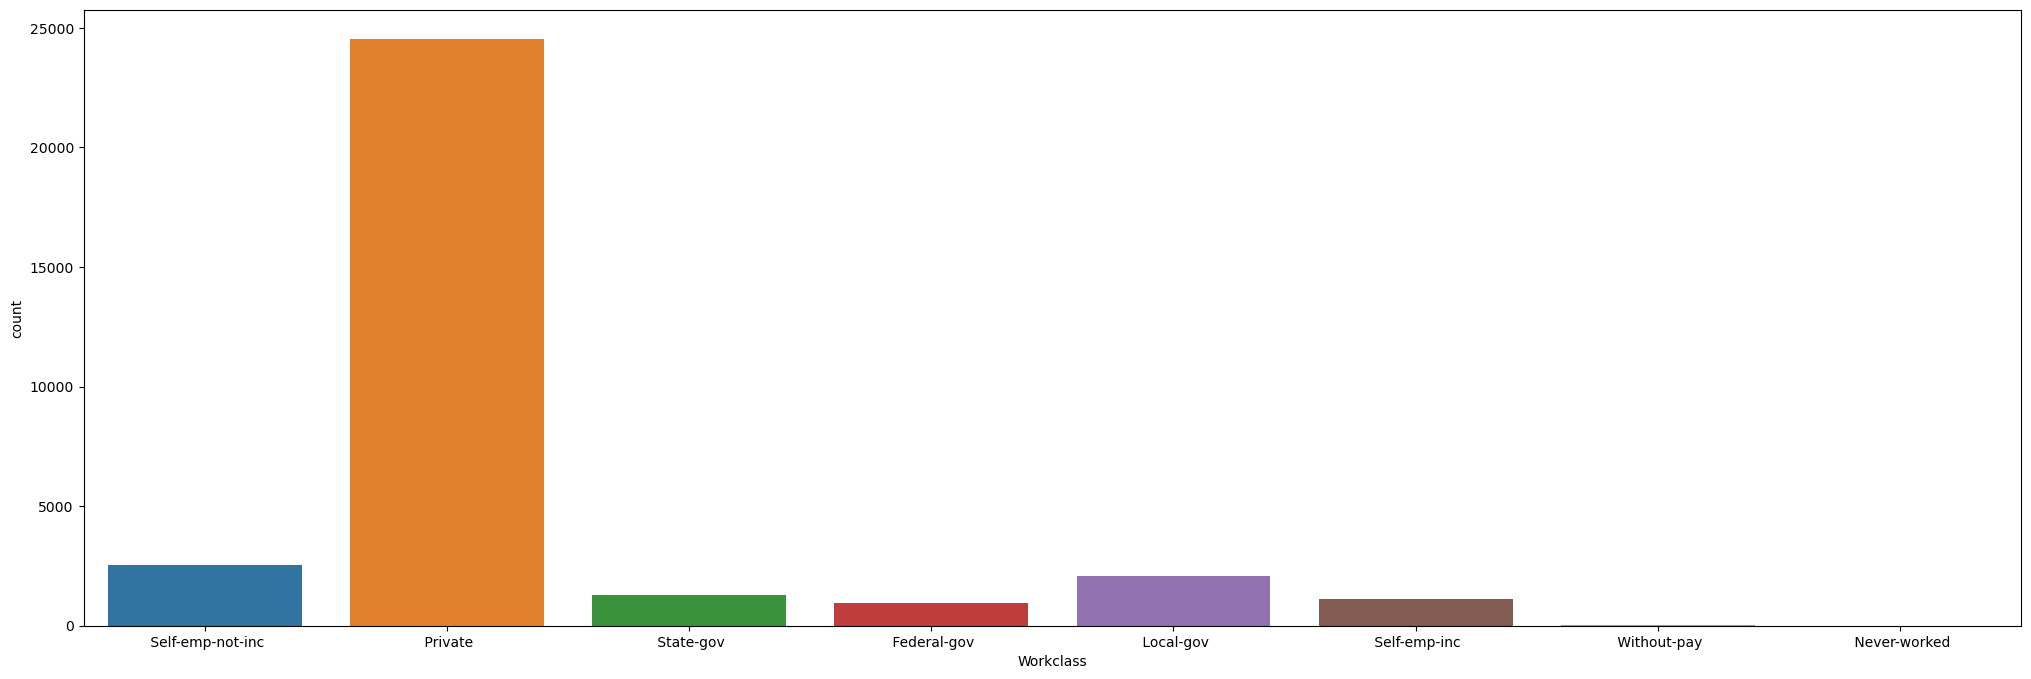

In [20]:
plt.figure(figsize = (25,8))
sns.countplot(df['Workclass'])
plt.show()

We see there are more people who are working in private and there are also withoutpay and never-worked persons.

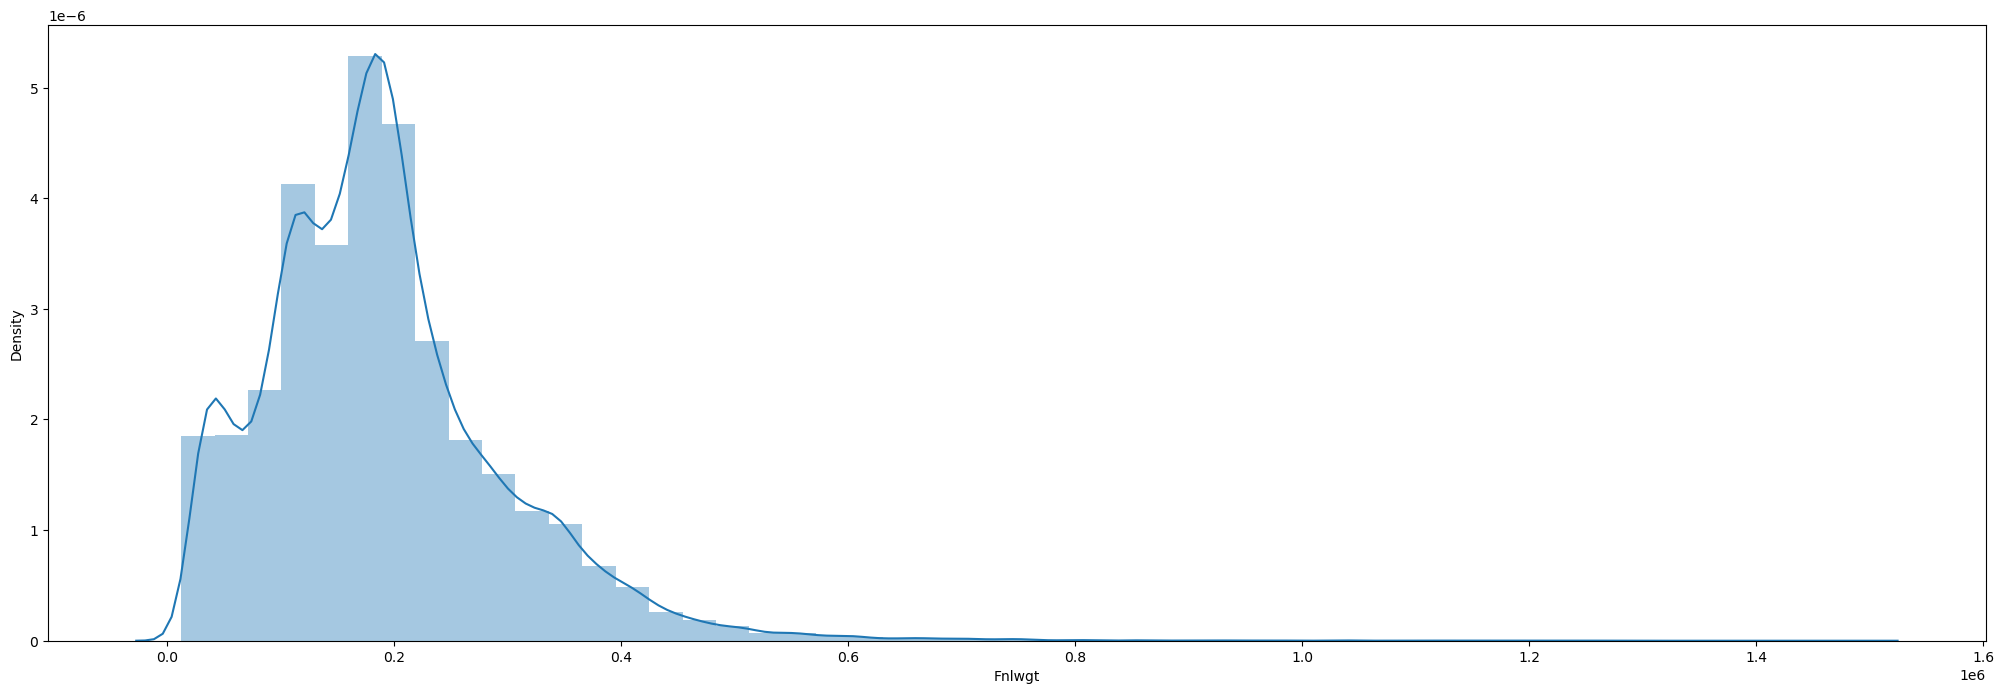

In [21]:
plt.figure(figsize = (25,8))
sns.distplot(df['Fnlwgt'])
plt.show()

We see there are more people with Fnlwgt ranging 0.2 and also there are outliers and skewness.

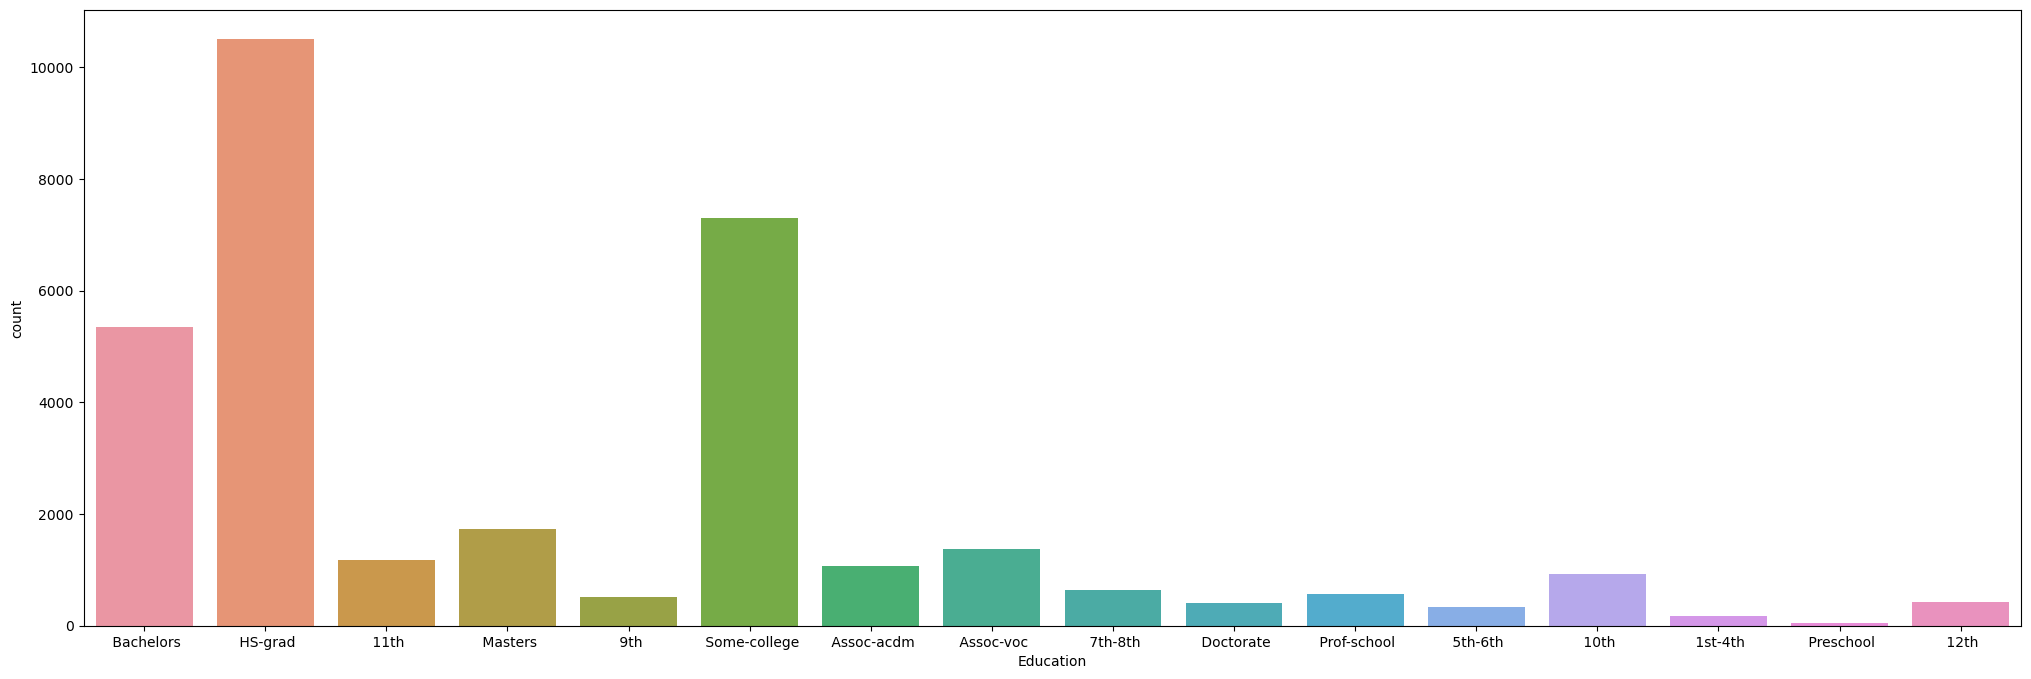

In [22]:
plt.figure(figsize = (25,8))
sns.countplot(df['Education'])
plt.show()

We see there are around 10000 and above people with HS-graduate and almost 7000 people with Some-college education. Thereare very few with pre-school and 1st-4th education.

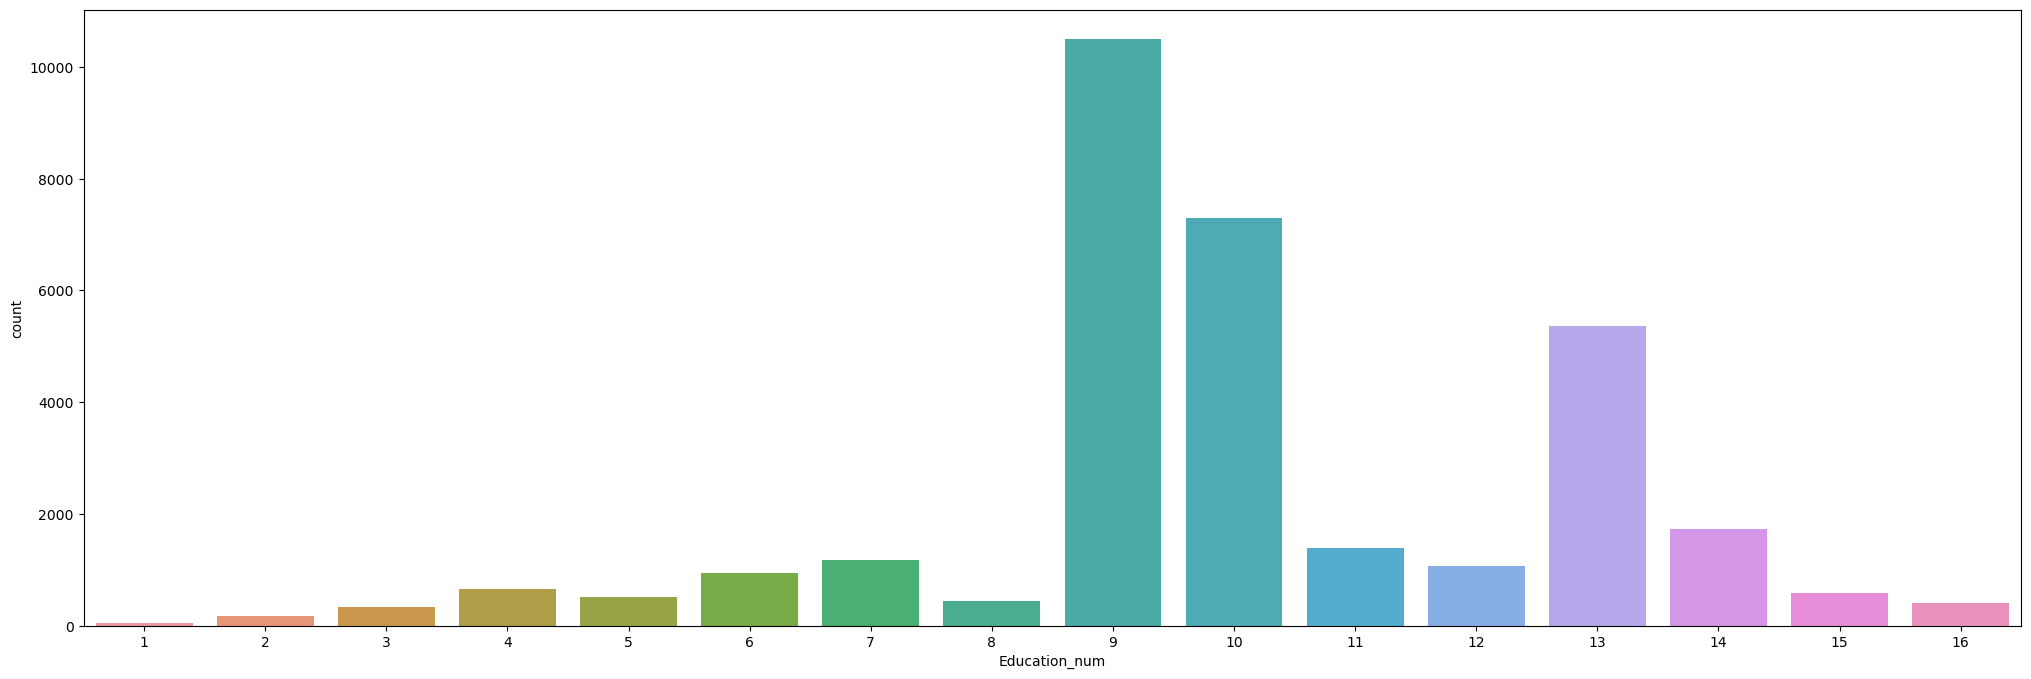

In [23]:
plt.figure(figsize = (25,8))
sns.countplot(df['Education_num'])
plt.show()

We see there are more people with education_number 9 and 10 and very few are with education_num 1, 2 and 3.

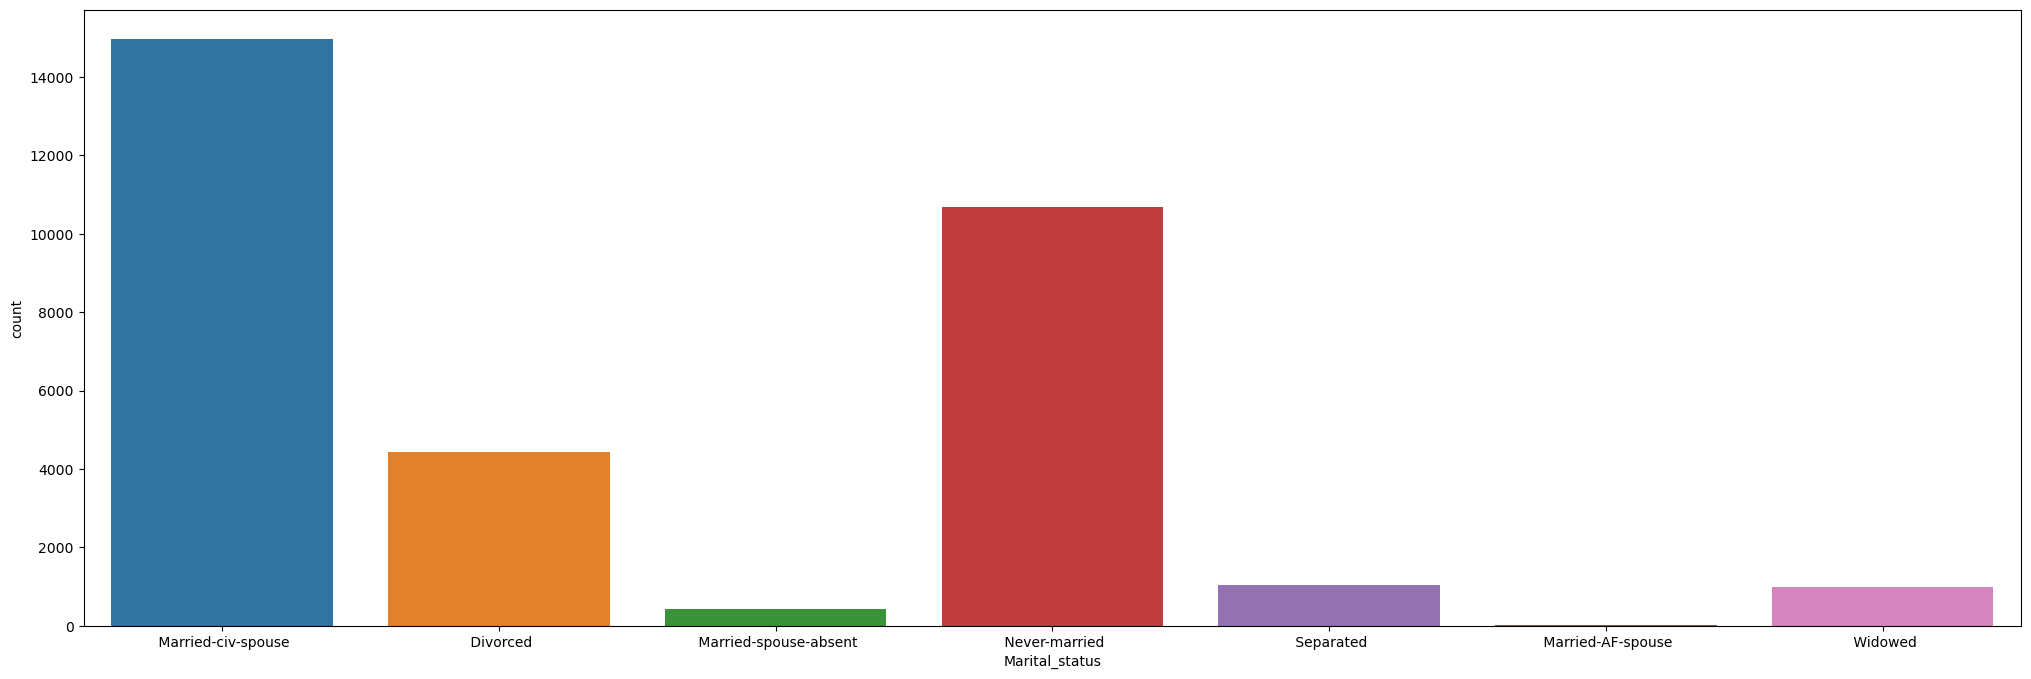

In [24]:
plt.figure(figsize = (25,8))
sns.countplot(df['Marital_status'])
plt.show()

We see there is more count of people with Married-CV_spouse and next is never married also. Very few are from Married-AF spouse and married-spouse absent.

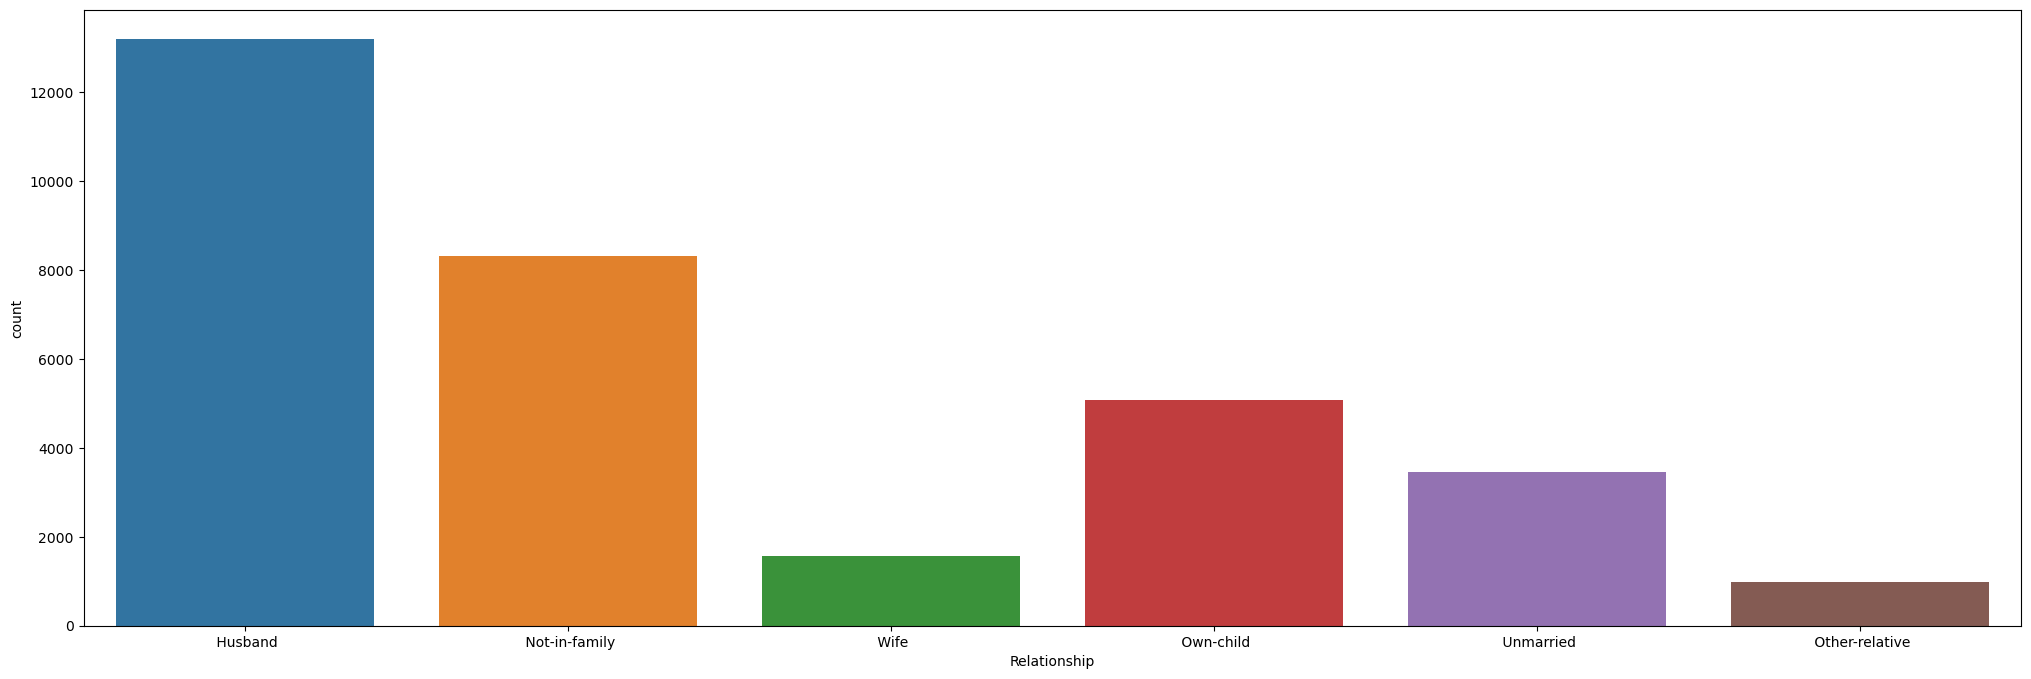

In [25]:
plt.figure(figsize = (25,8))
sns.countplot(df['Relationship'])
plt.show()

There are more people whose relationship is husband and who are not-in-family and very few are from other-relative.

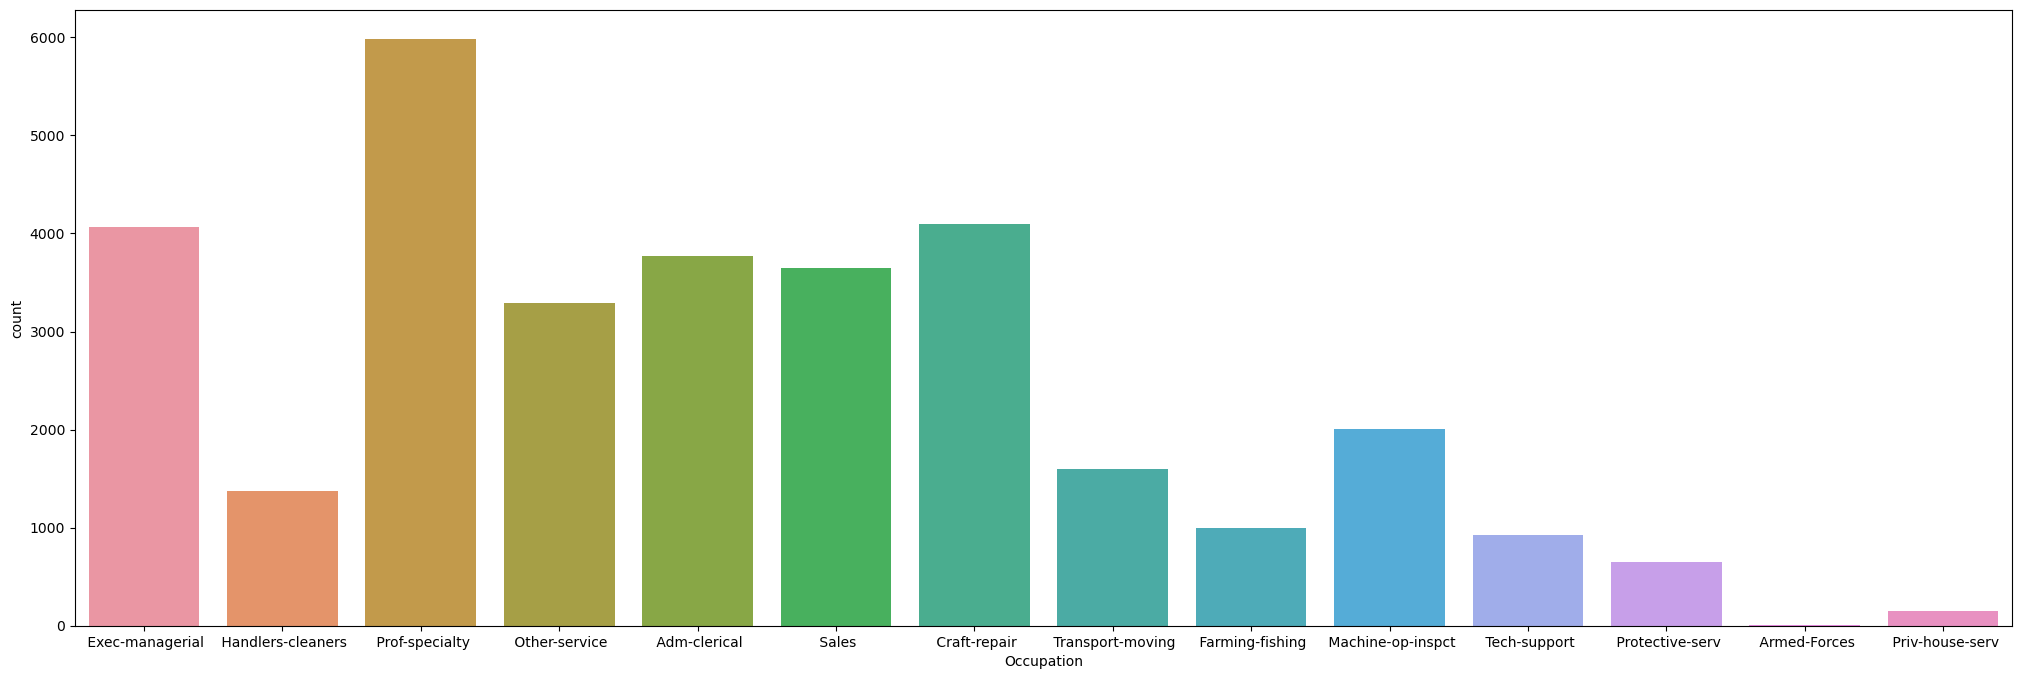

In [26]:
plt.figure(figsize = (25,8))
sns.countplot(df['Occupation'])
plt.show()

We see there are more people which occupation as prof-speciality, Exec-managerial and craft-repair but very few are from Armed-Forces and Priv-house-serv.

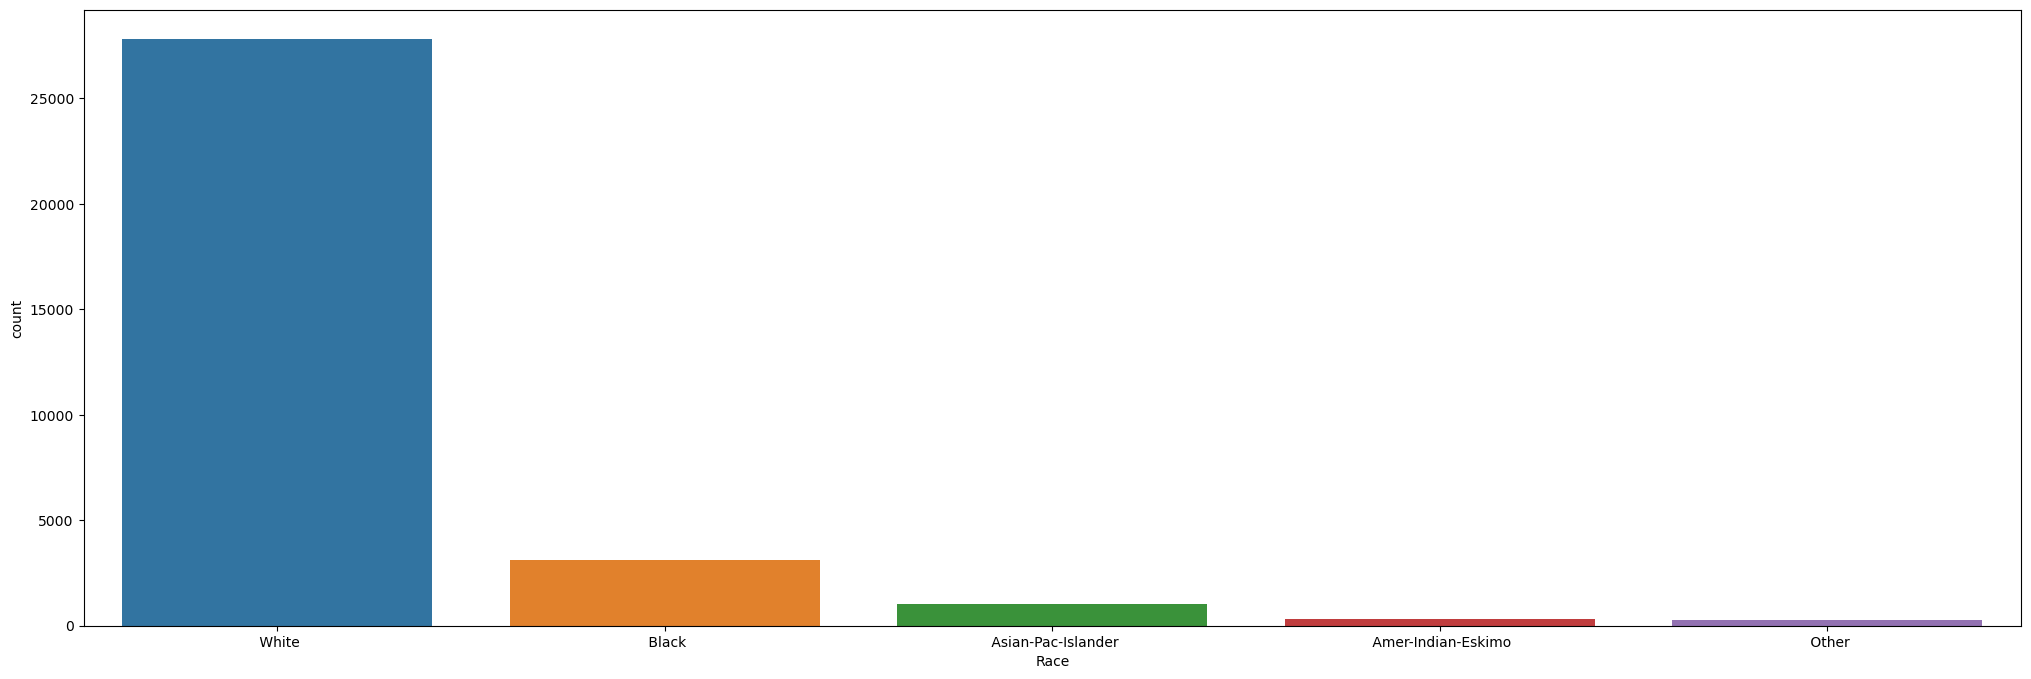

In [27]:
plt.figure(figsize = (25,8))
sns.countplot(df['Race'])
plt.show()

We see there are more people with race white and very few are from other and amer-indian-eskimo races.

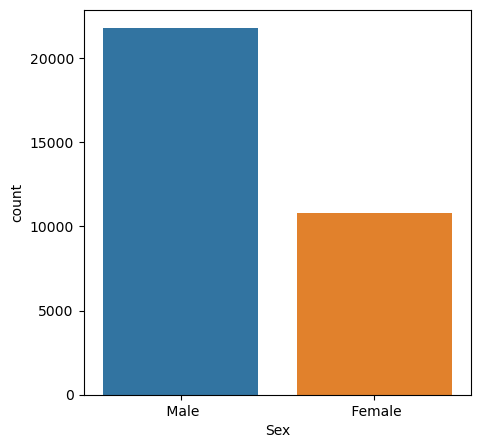

In [28]:
plt.figure(figsize = (5,5))
sns.countplot(df['Sex'])
plt.show()

We see there are more people with sex Male and very few are females.

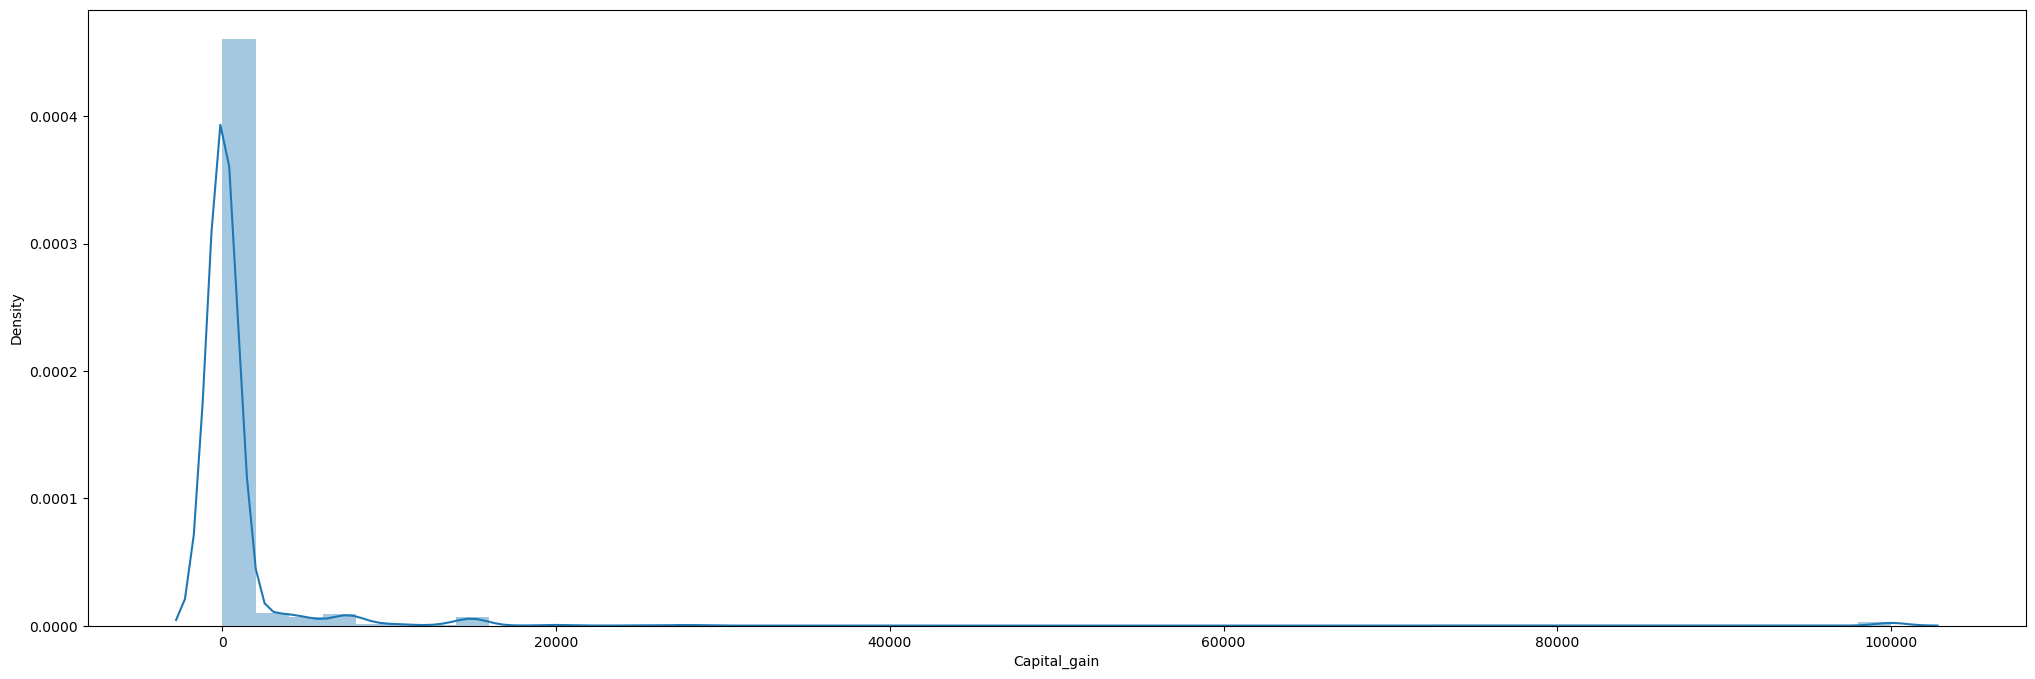

In [29]:
plt.figure(figsize = (25,8))
sns.distplot(df['Capital_gain'])
plt.show()

We see there are more people with capital_gain within 0 and 2000.

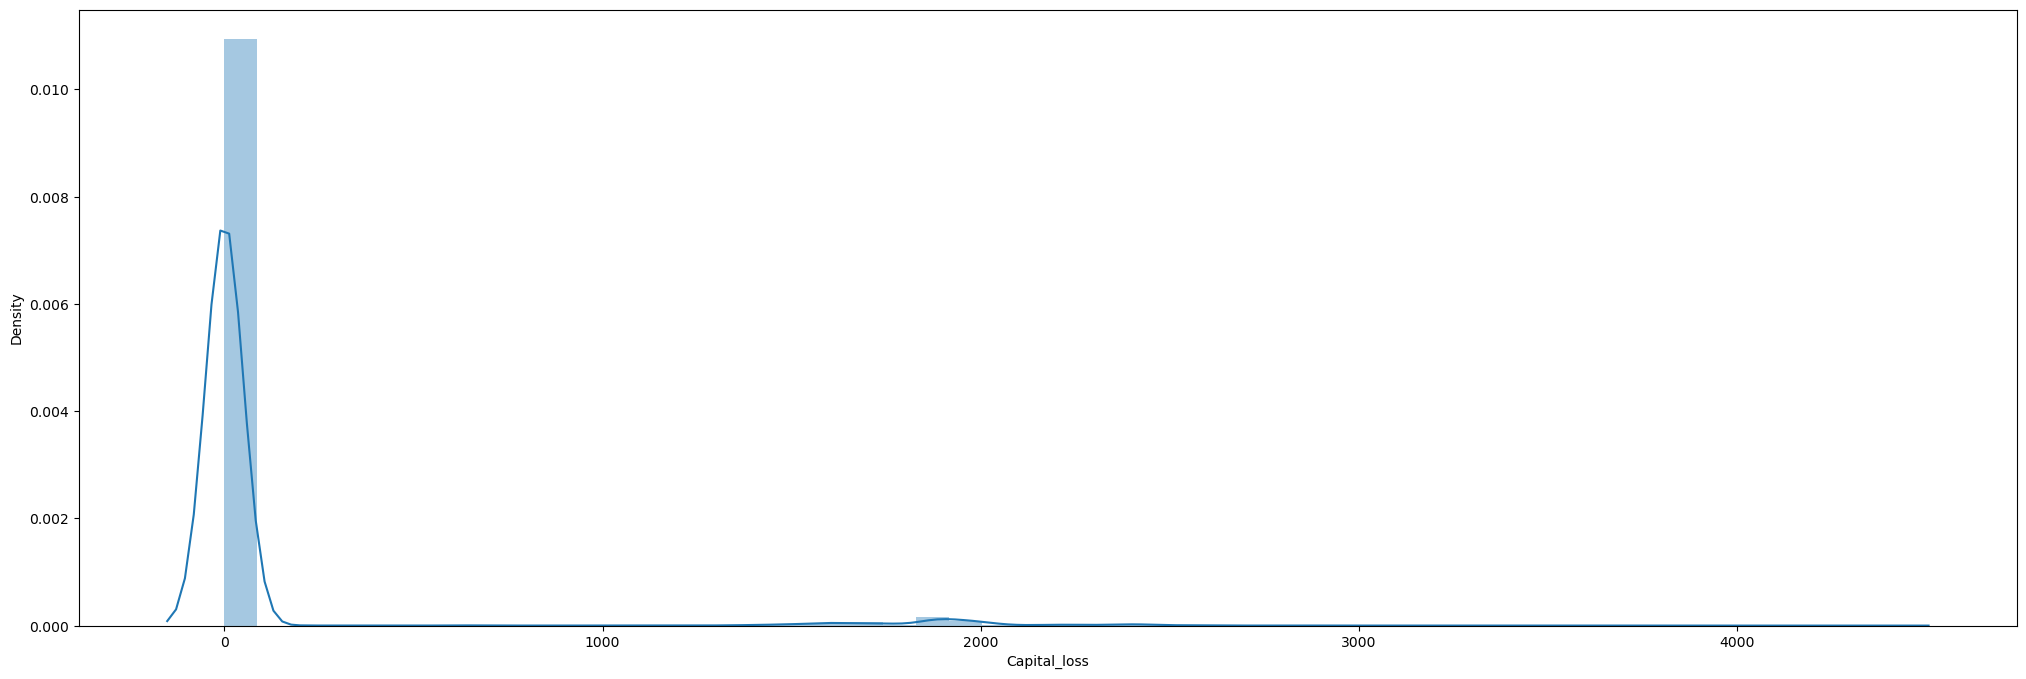

In [30]:
plt.figure(figsize = (25,8))
sns.distplot(df['Capital_loss'])
plt.show()

We see there are people whose capital_loss is 0 and very few in range of 2000.

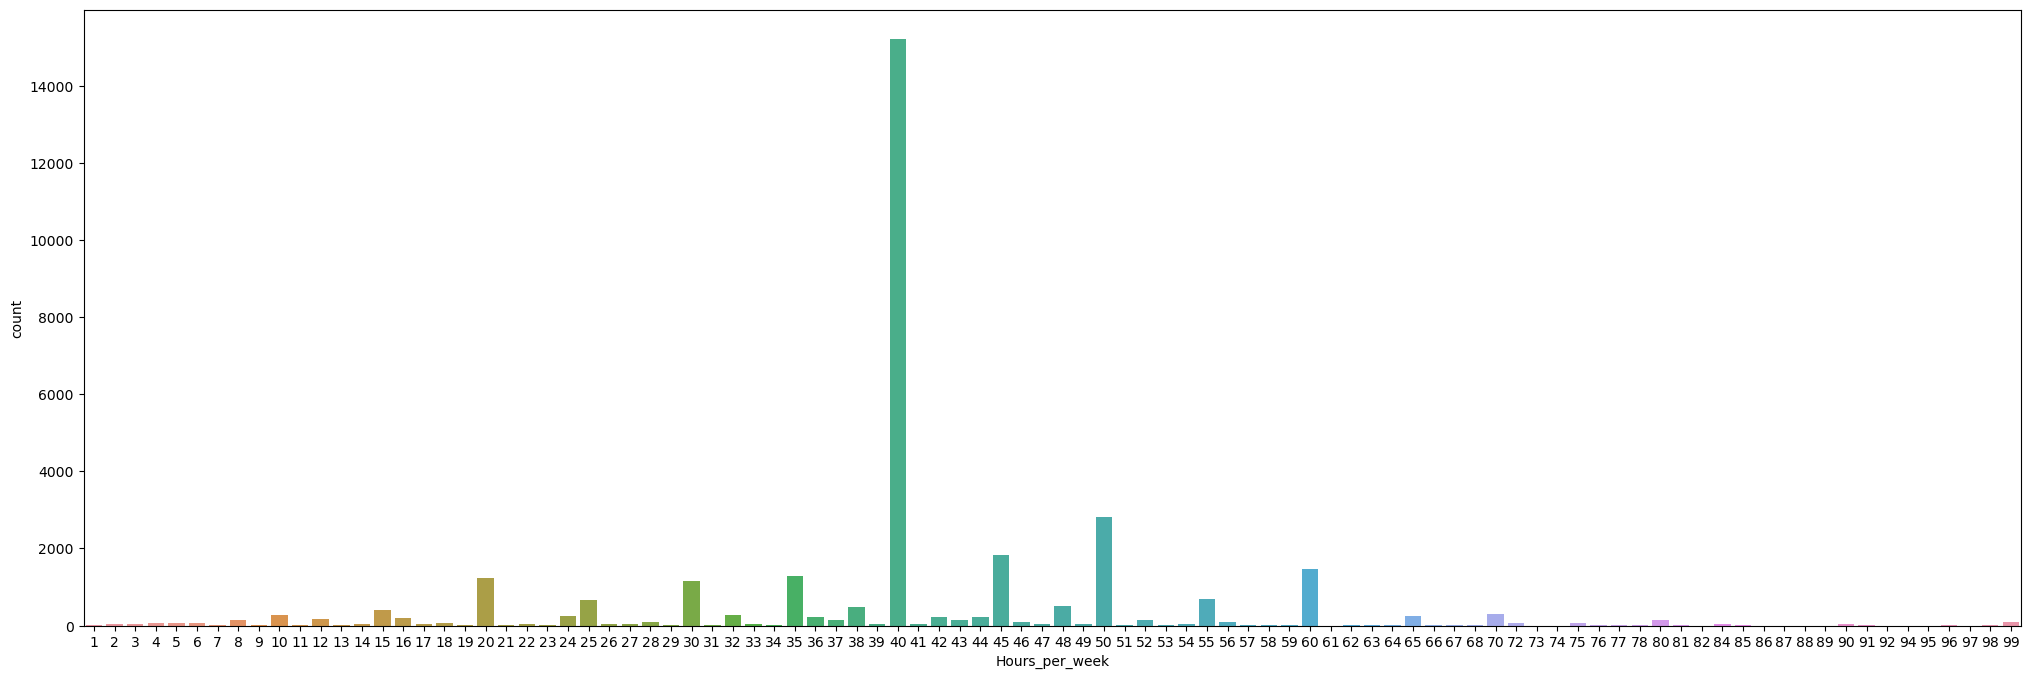

In [31]:
plt.figure(figsize = (25,8))
sns.countplot(df['Hours_per_week'])
plt.show()

We see there are more people who works for 40-50 hours per week.  

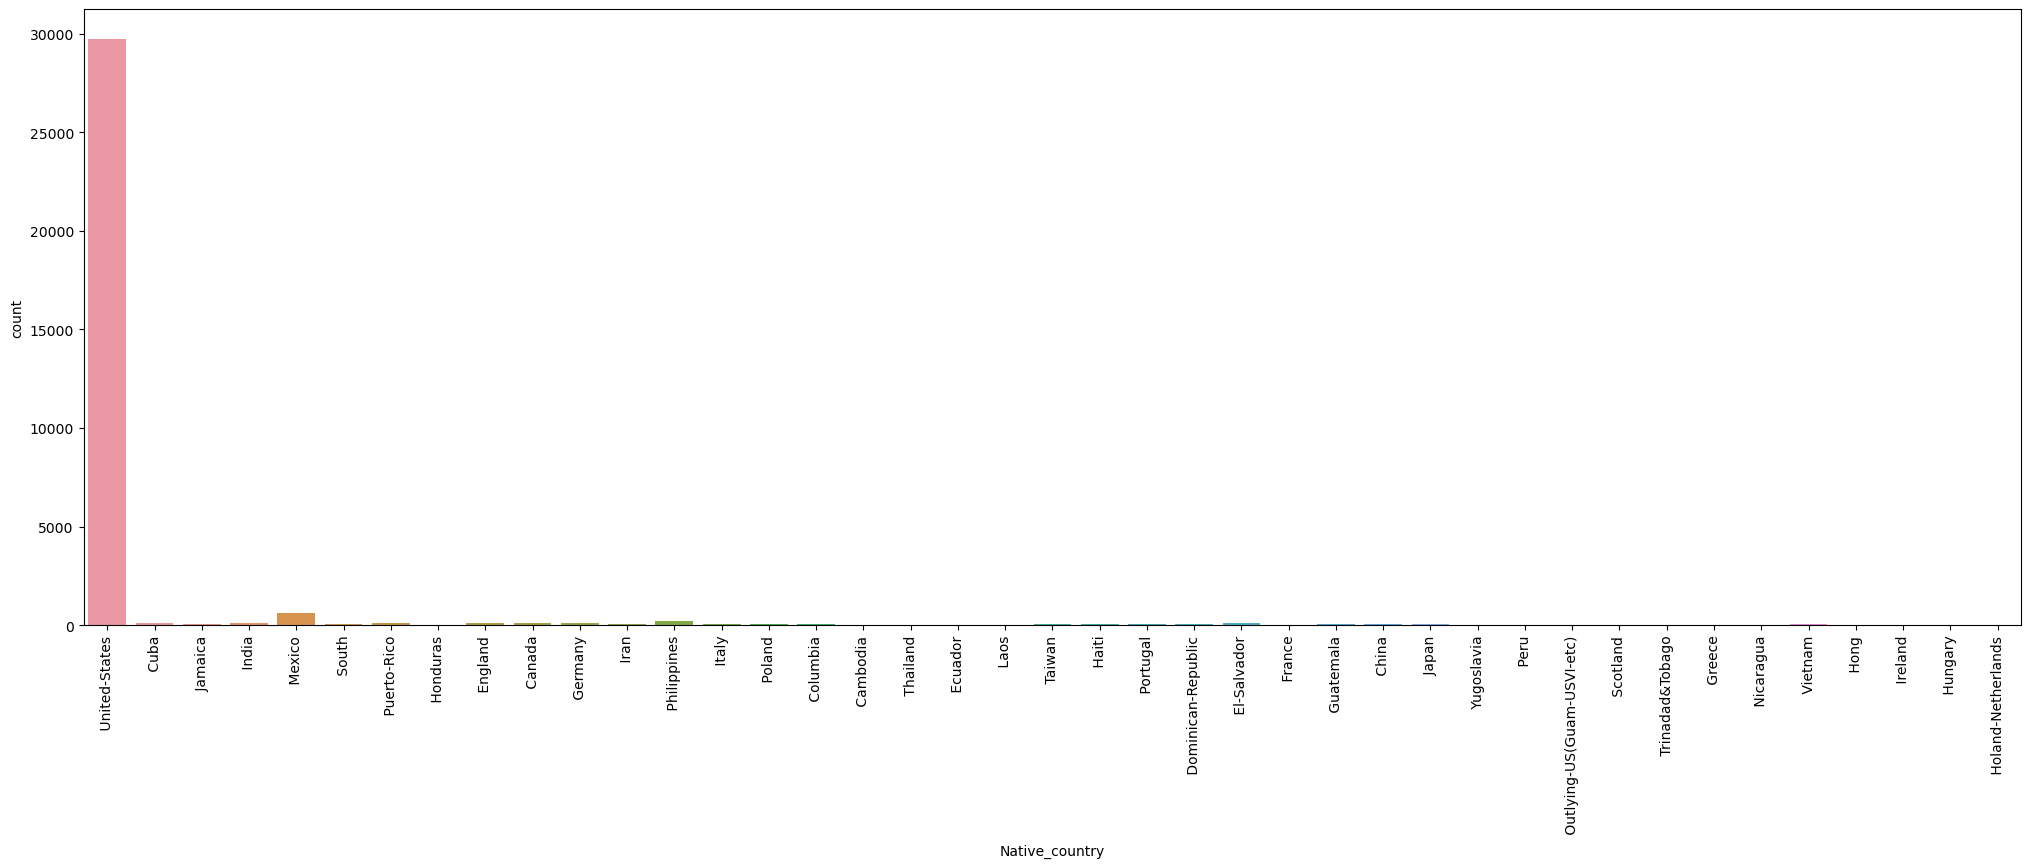

In [32]:
plt.figure(figsize = (25,8))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

We see there are more people who are from United-states and very few from other countries.

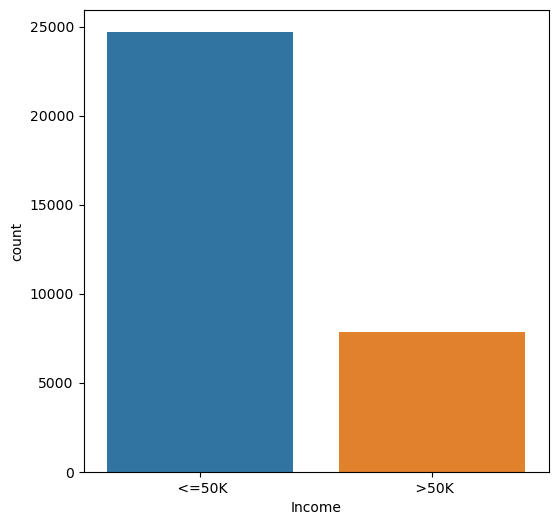

In [33]:
plt.figure(figsize = (6,6))
sns.countplot(df['Income'])
plt.show()

We see there are more people whose income is less than or equal to 50k. Since this is our target varibale we see there is huge imbalance, so we need to balance the dataset.

#### Bi-variate Analysis.

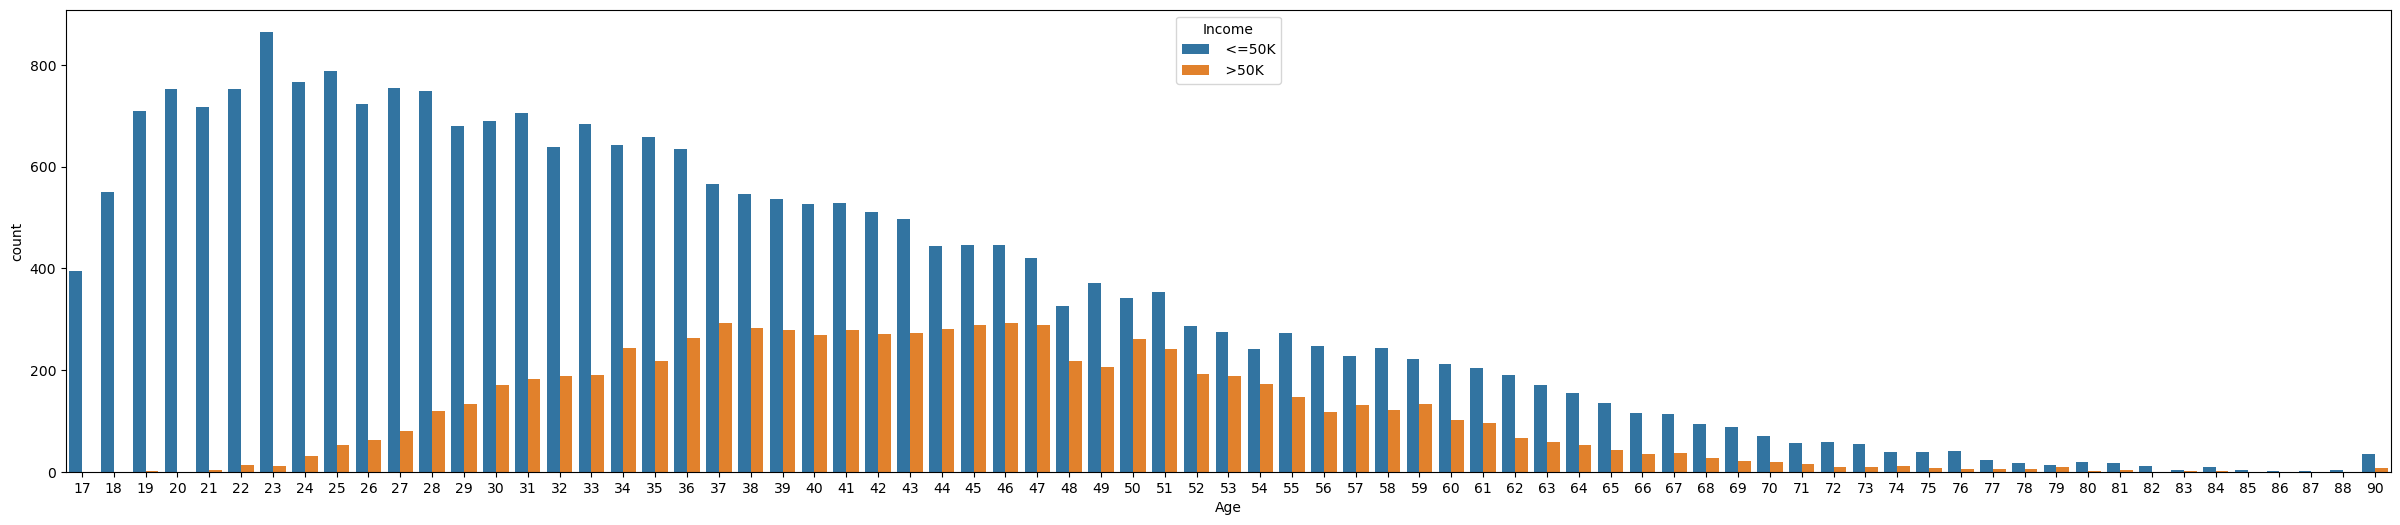

In [34]:
plt.figure(figsize= (30,6))
sns.countplot(x = 'Age', hue = 'Income', data = df)
plt.show()

We see there are more people whose salary is less than 50k between the age 17 to 35 and then the age increases may be because of experience they may get higher salary so there is greater than 50k.

In [35]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

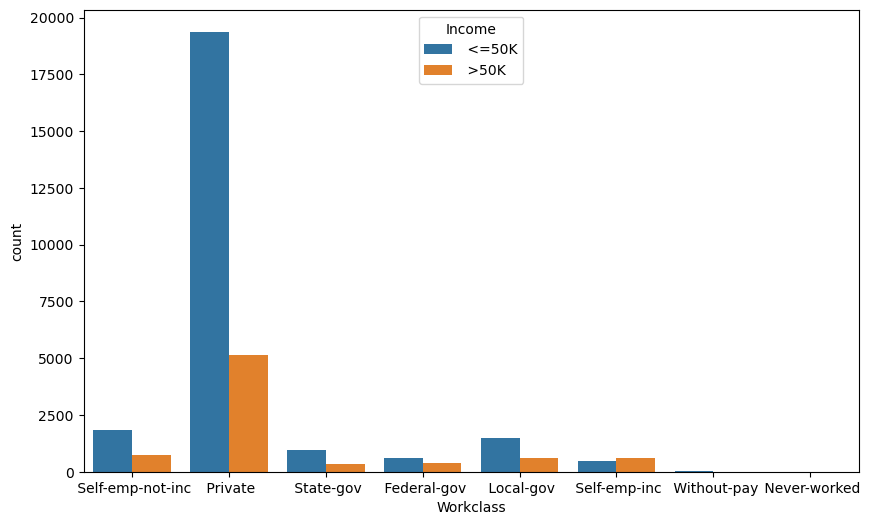

In [36]:
plt.figure(figsize= (10,6))
sns.countplot(x = 'Workclass', hue = 'Income', data = df)
plt.show()

We see that more employees are from Private and are having salary less than 50K. We also see that without-pay and never worked are very less in count

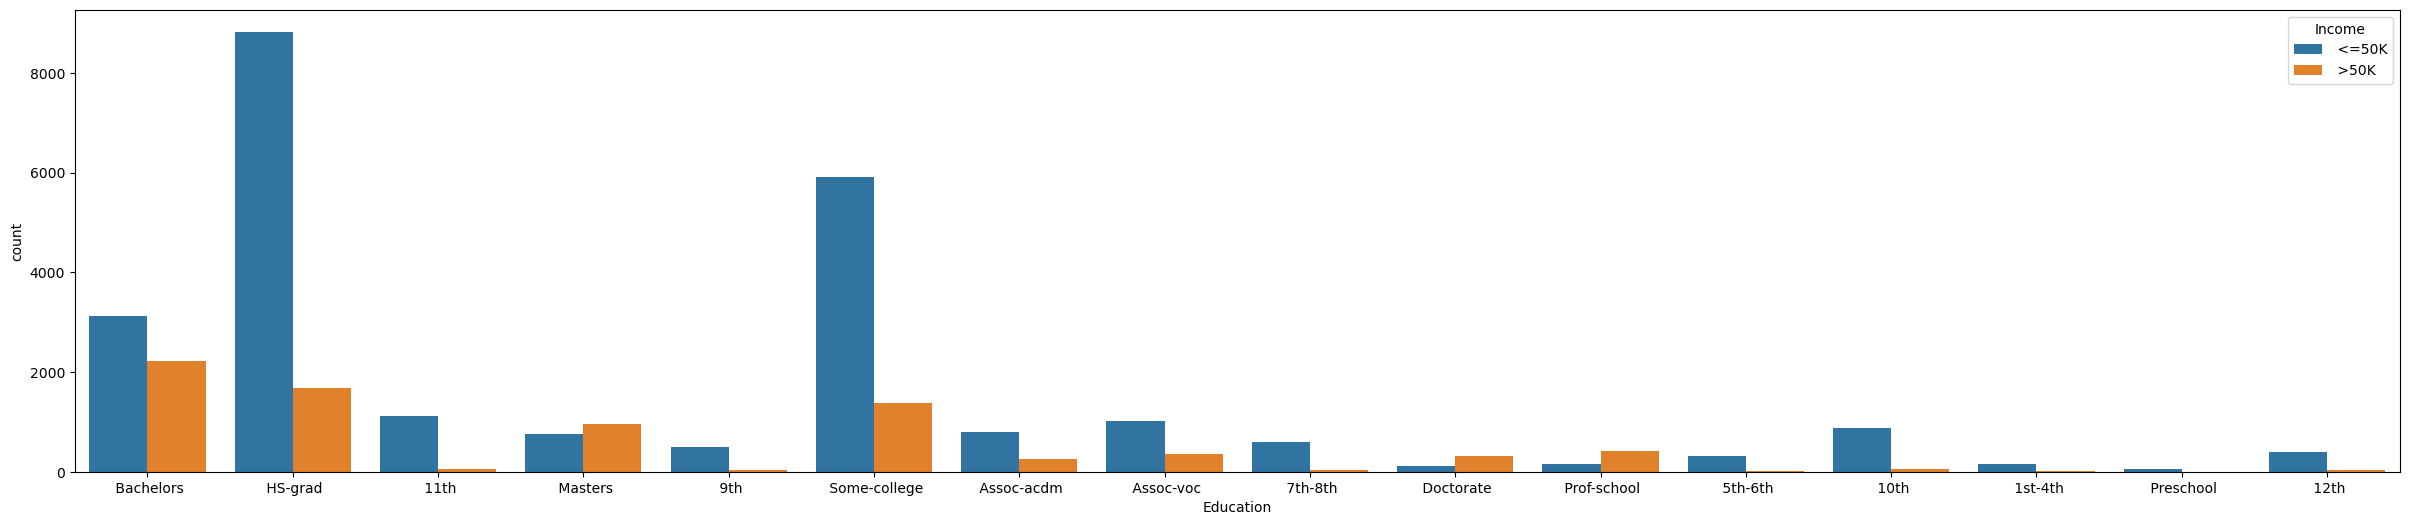

In [37]:
plt.figure(figsize= (30,6))
sns.countplot(x = 'Education', hue = 'Income', data = df)
plt.show()

We see that education with HS grad has high count and also there income is less than 50K for most of them and also Some-college has salary less than 50K.

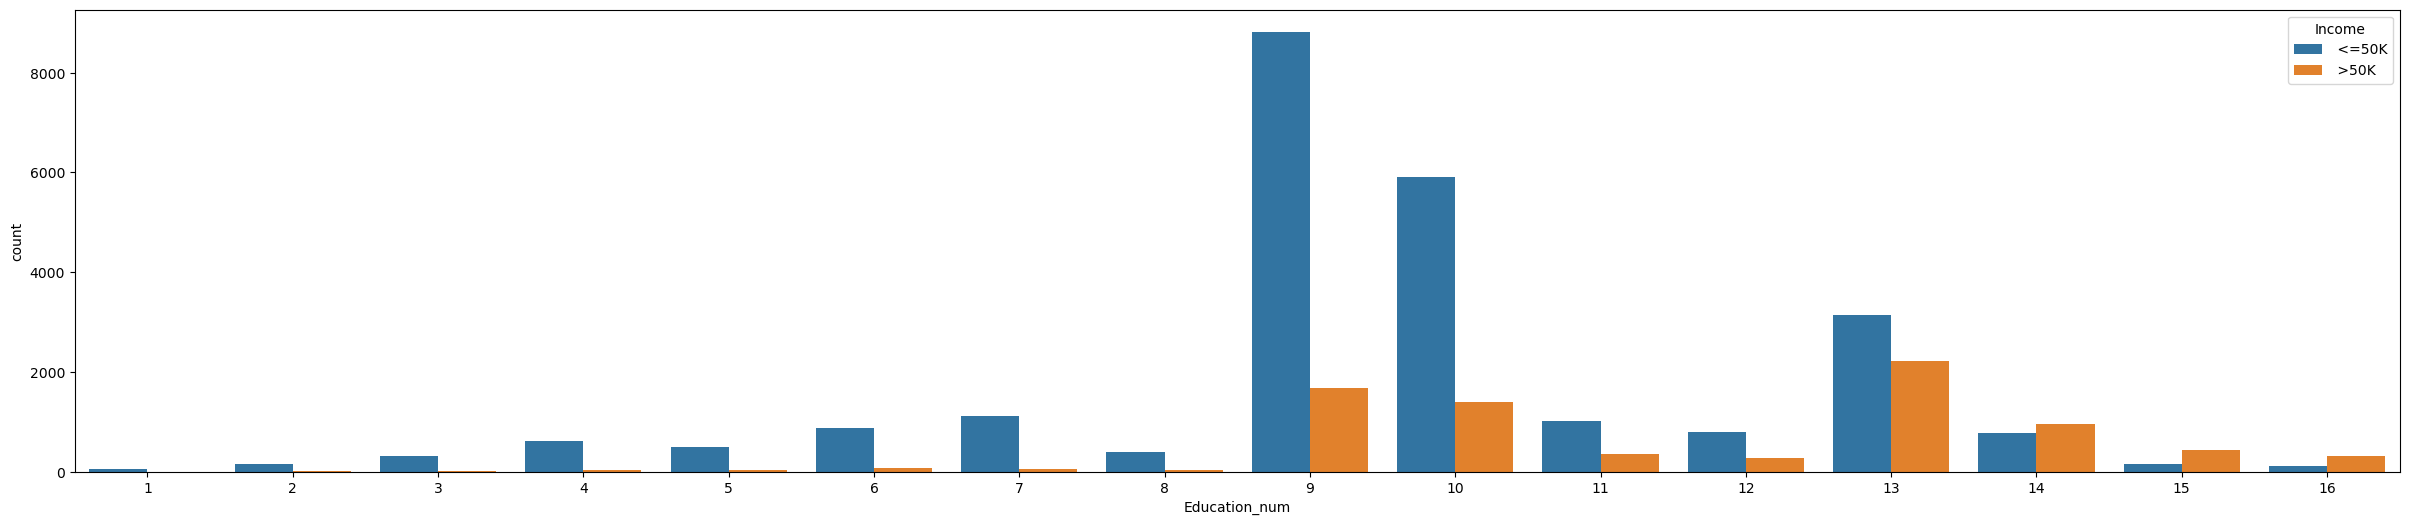

In [38]:
plt.figure(figsize= (30,6))
sns.countplot(x = 'Education_num', hue = 'Income', data = df)
plt.show()

We see there are more people with education 9 and there income is also less than 50k. 

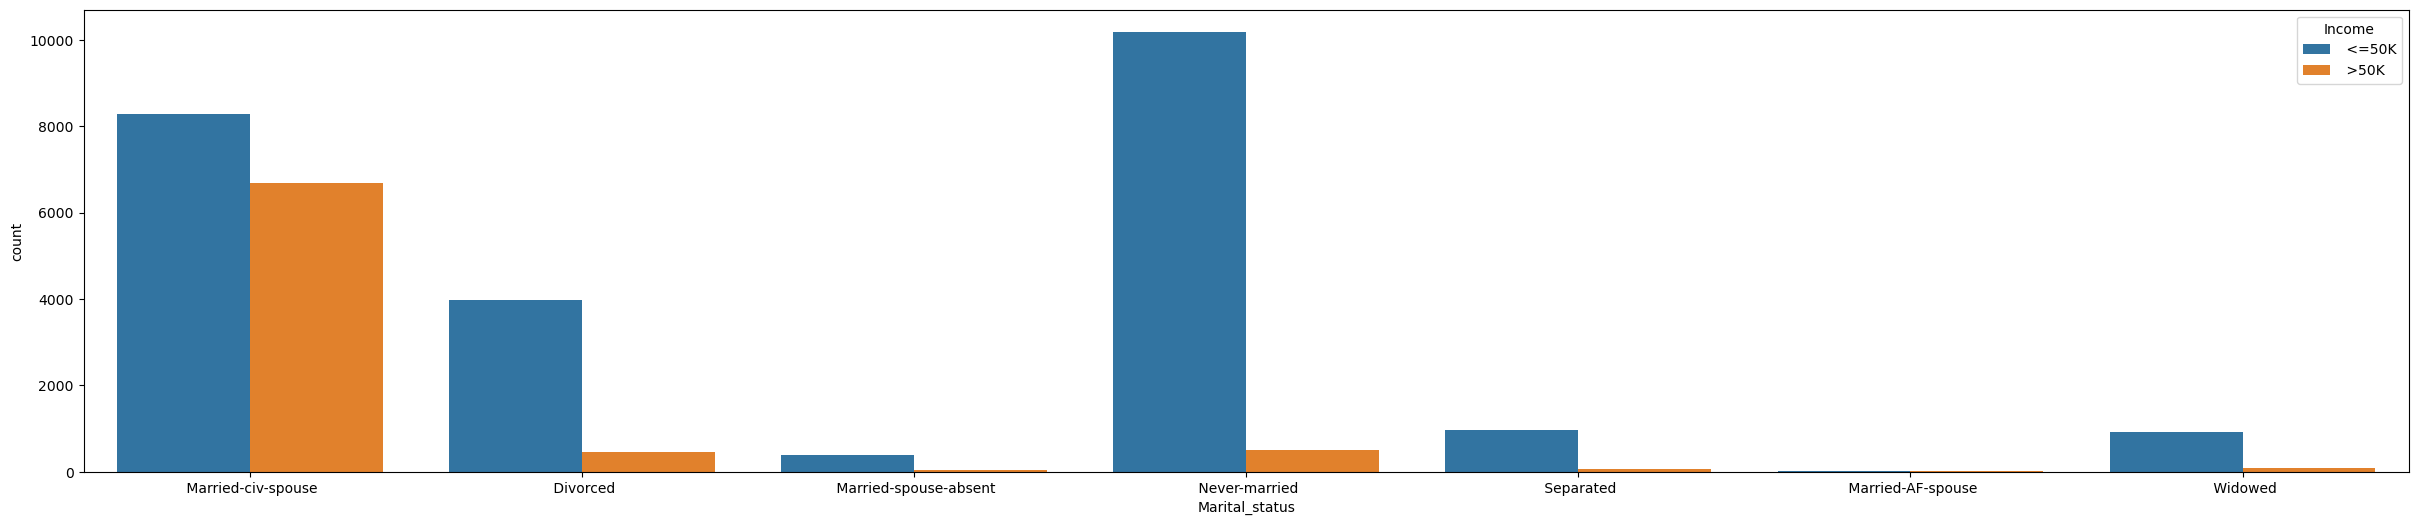

In [39]:
plt.figure(figsize= (30,6))
sns.countplot(x = 'Marital_status', hue = 'Income', data = df)
plt.show()

The never-married has more count for less than 50K as income. Almost very less difference is found in married-civ-spouse income ratios. 

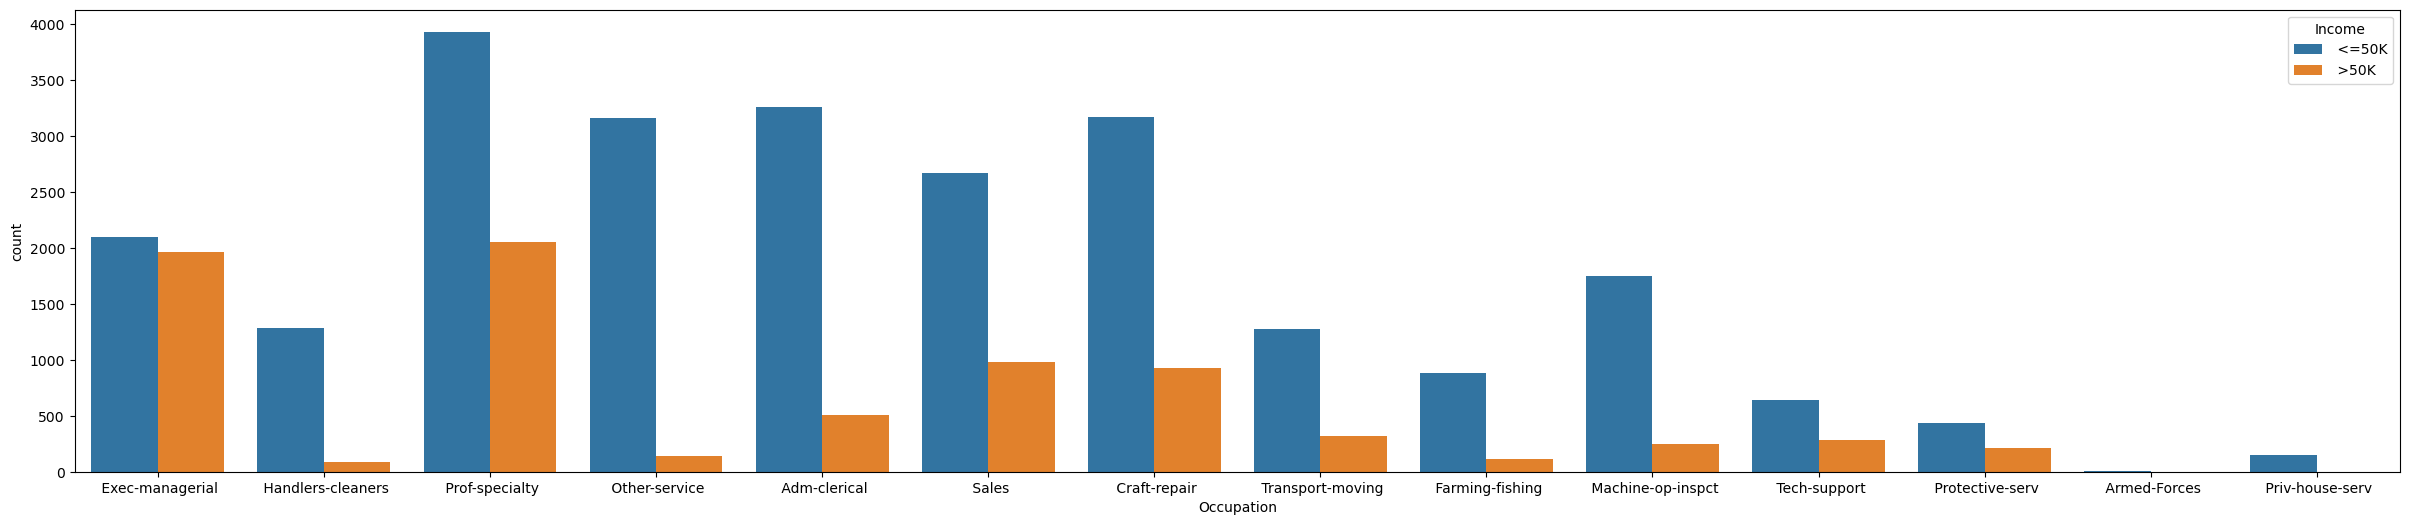

In [40]:
plt.figure(figsize= (30,6))
sns.countplot(x = 'Occupation', hue = 'Income', data = df)
plt.show()

We see that Prof-speciality has high count for income lessthan 50k and Exec-managerial has almost equal shares on both income values.

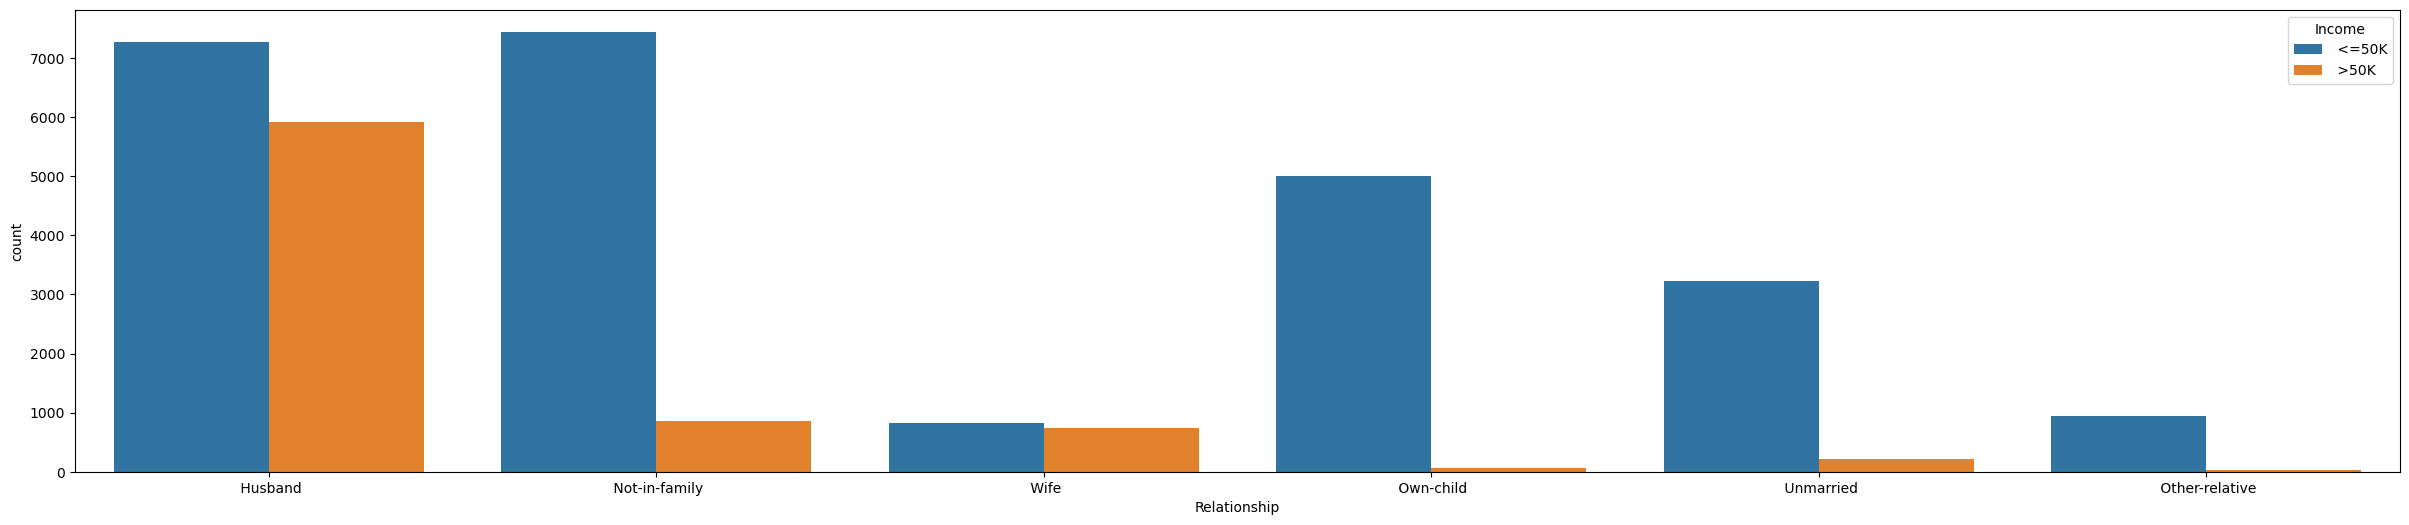

In [41]:
plt.figure(figsize= (30,6))
sns.countplot(x = 'Relationship', hue = 'Income', data = df)
plt.show()

We see that relationship "not-in-family" has high count for income less than 50k and very few for income greater than 50k. Husband has almost equal shares for both greater and lessthan 50k.

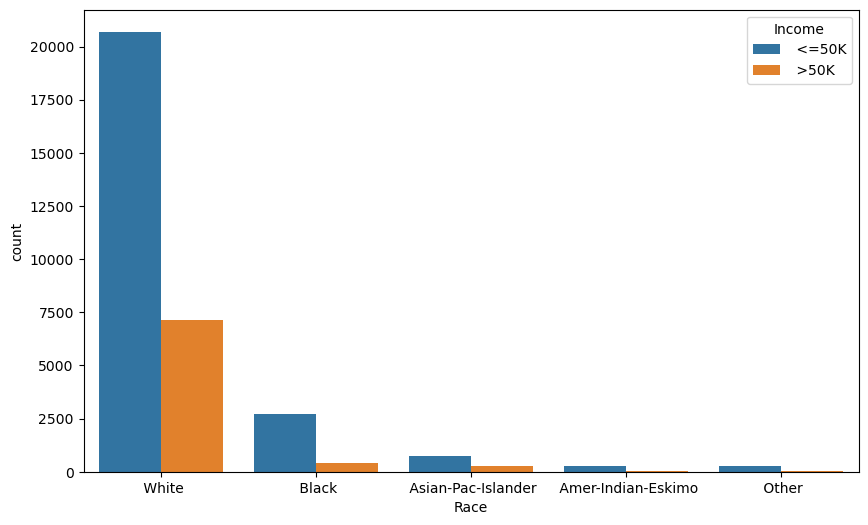

In [42]:
plt.figure(figsize= (10,6))
sns.countplot(x = 'Race', hue = 'Income', data = df)
plt.show()

We see that White race has more counts for people with less than 50k and very few for amer-indian-eskimo and other races have very few members salary greater than 50k.

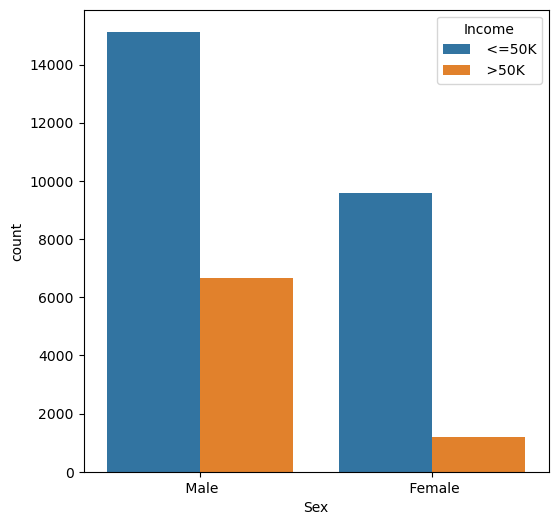

In [43]:
plt.figure(figsize= (6,6))
sns.countplot(x = 'Sex', hue = 'Income', data = df)
plt.show()

We see that males income has highest count for greater than 50k and half of the males are having income less than 50k. For females the highest count for income greater than 50k and very few less than 1000 members has income greater than 50k.  

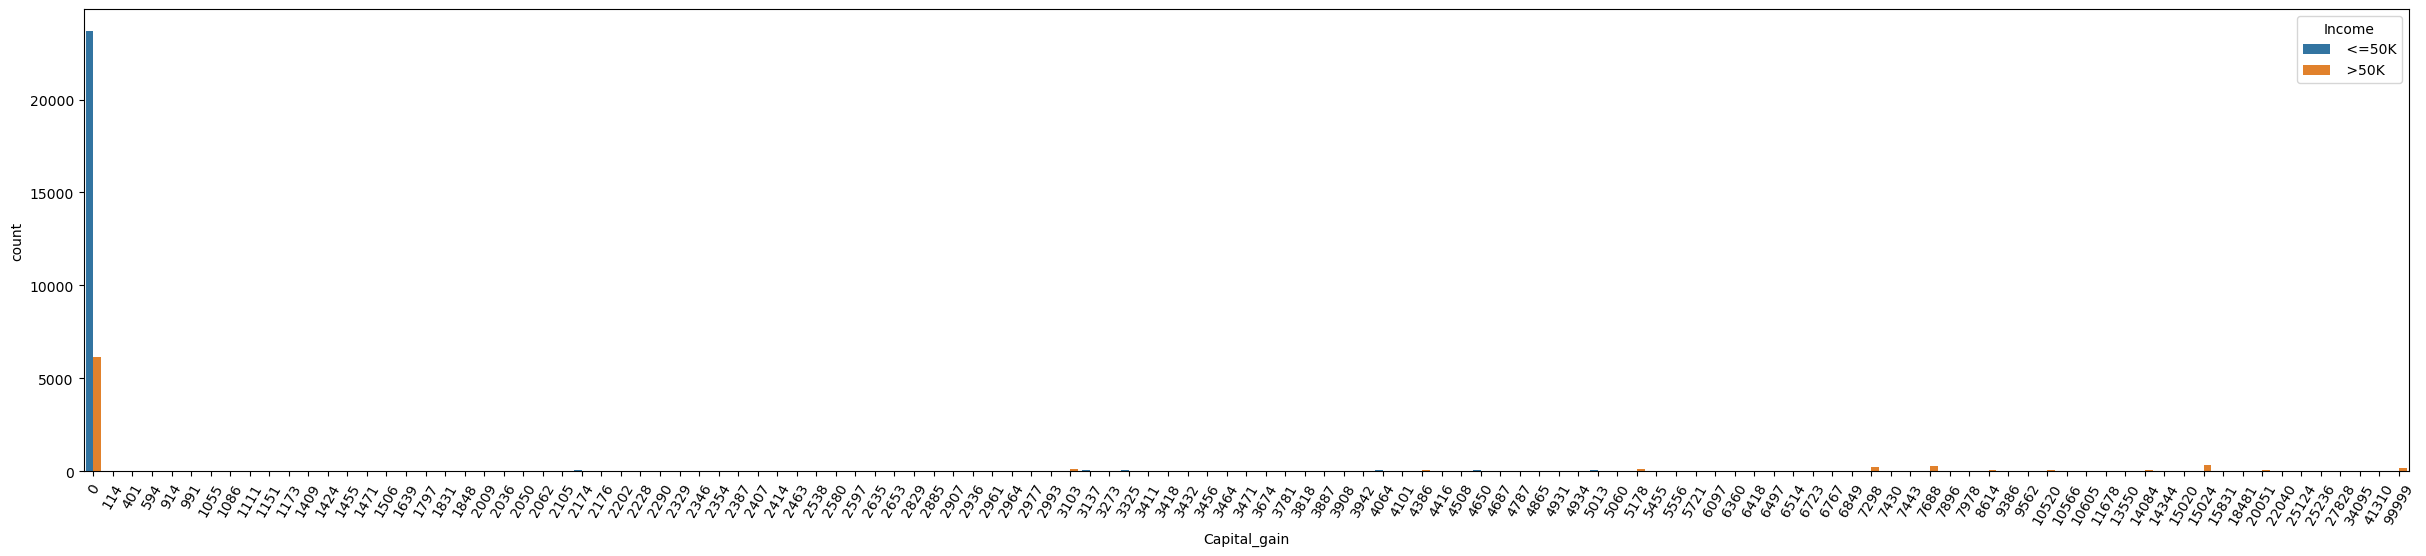

In [44]:
plt.figure(figsize= (30,6))
sns.countplot(x = 'Capital_gain', hue = 'Income', data = df)
plt.xticks(rotation = 60)
plt.show()

We see most of the count for capital gain is for 0 and their income has less than or equal to 50k.

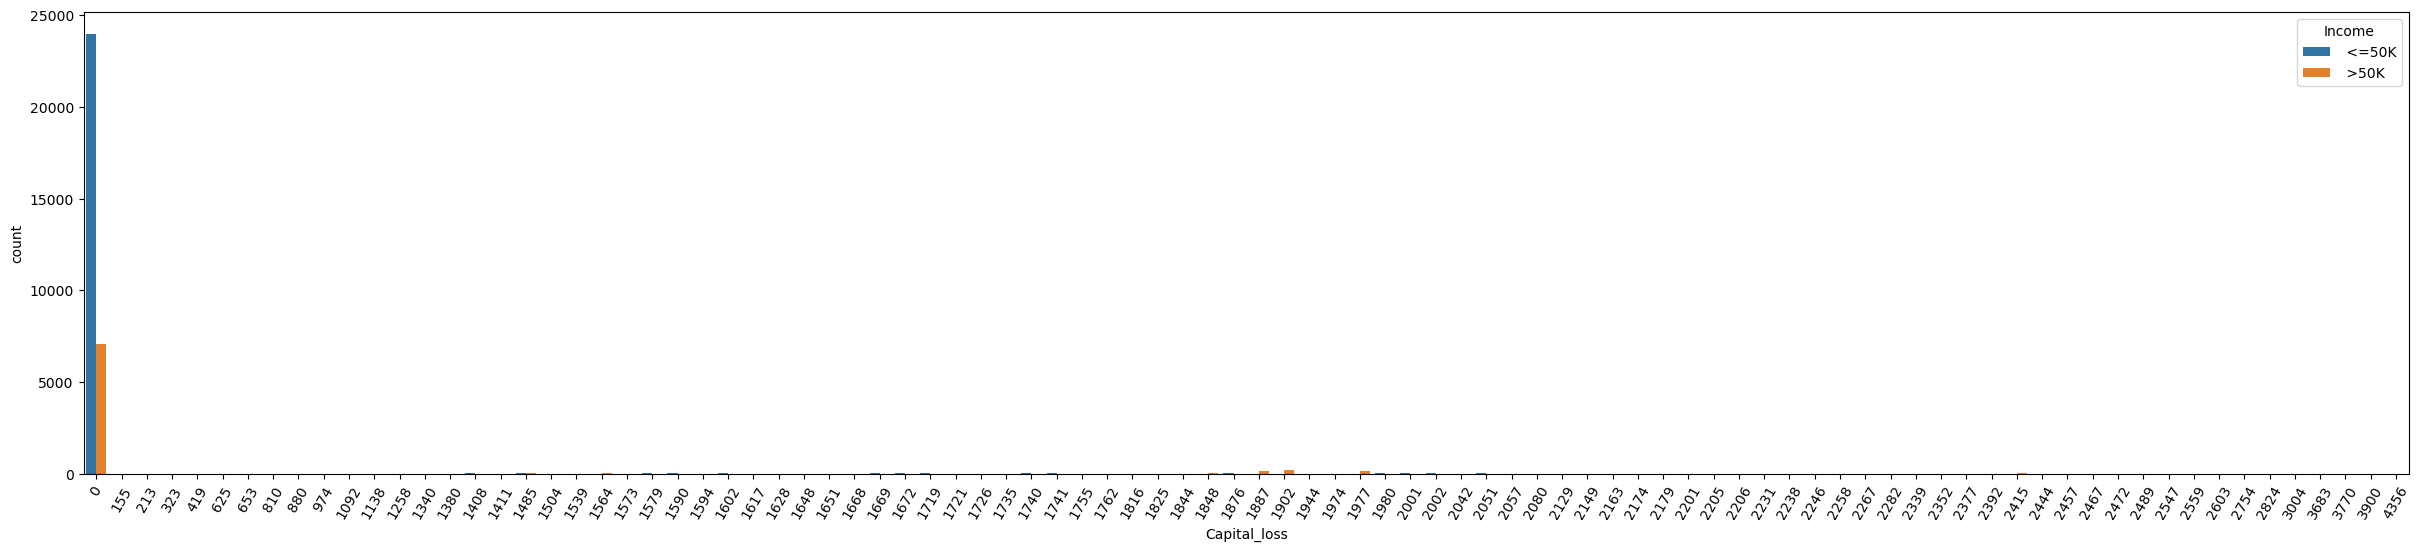

In [45]:
plt.figure(figsize= (30,6))
sns.countplot(x = 'Capital_loss', hue = 'Income', data = df)
plt.xticks(rotation = 60)
plt.show()

We see that capital_loss has greater value for income less than or equal to 50k. 

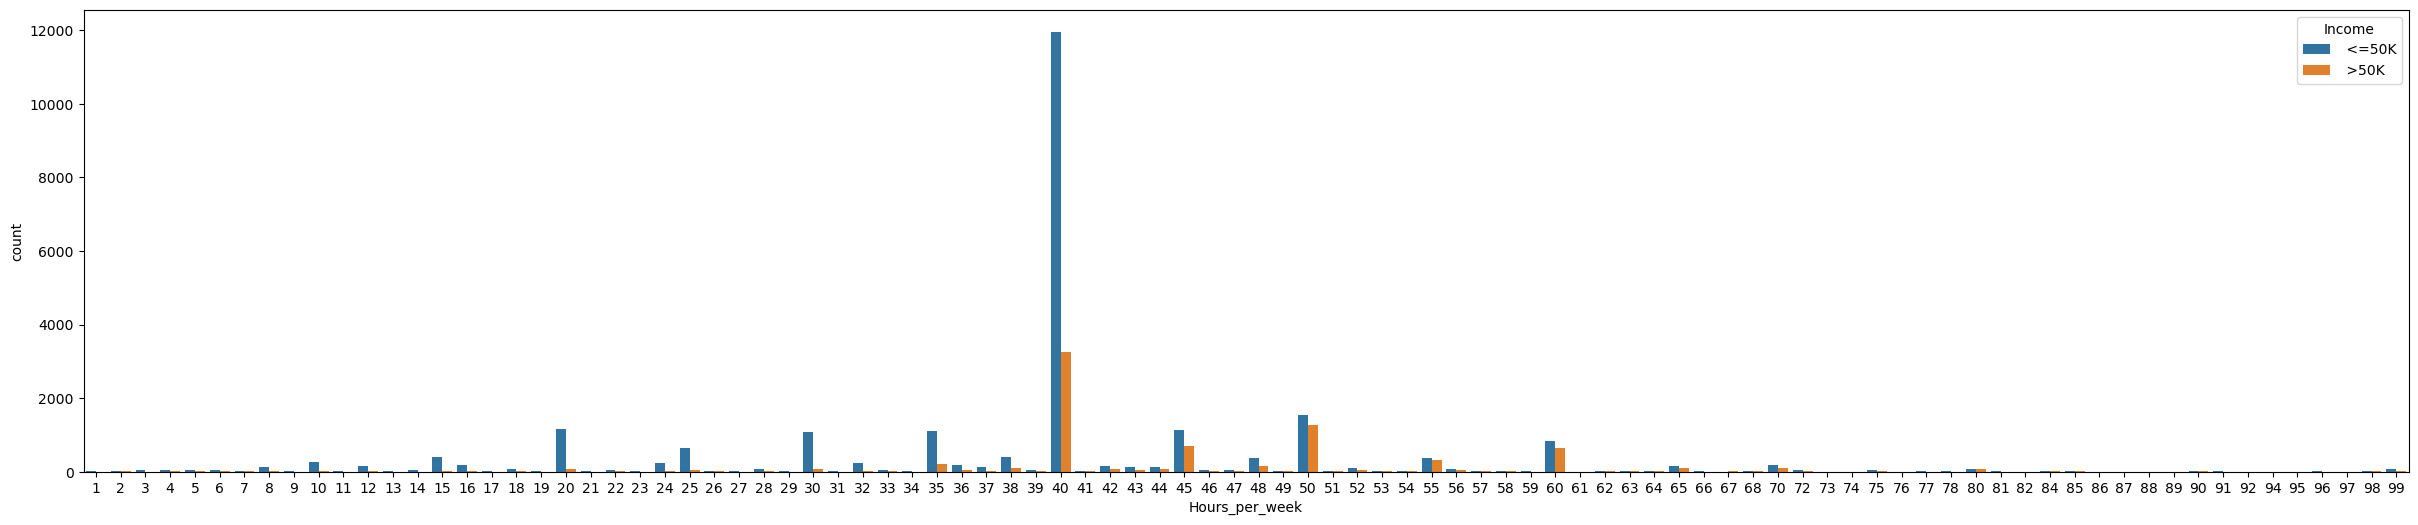

In [46]:
plt.figure(figsize= (30,6))
sns.countplot(x = 'Hours_per_week', hue = 'Income', data = df)
plt.show()

We see that 40-50 hours per week has high income count for less than or equal to 50k. 

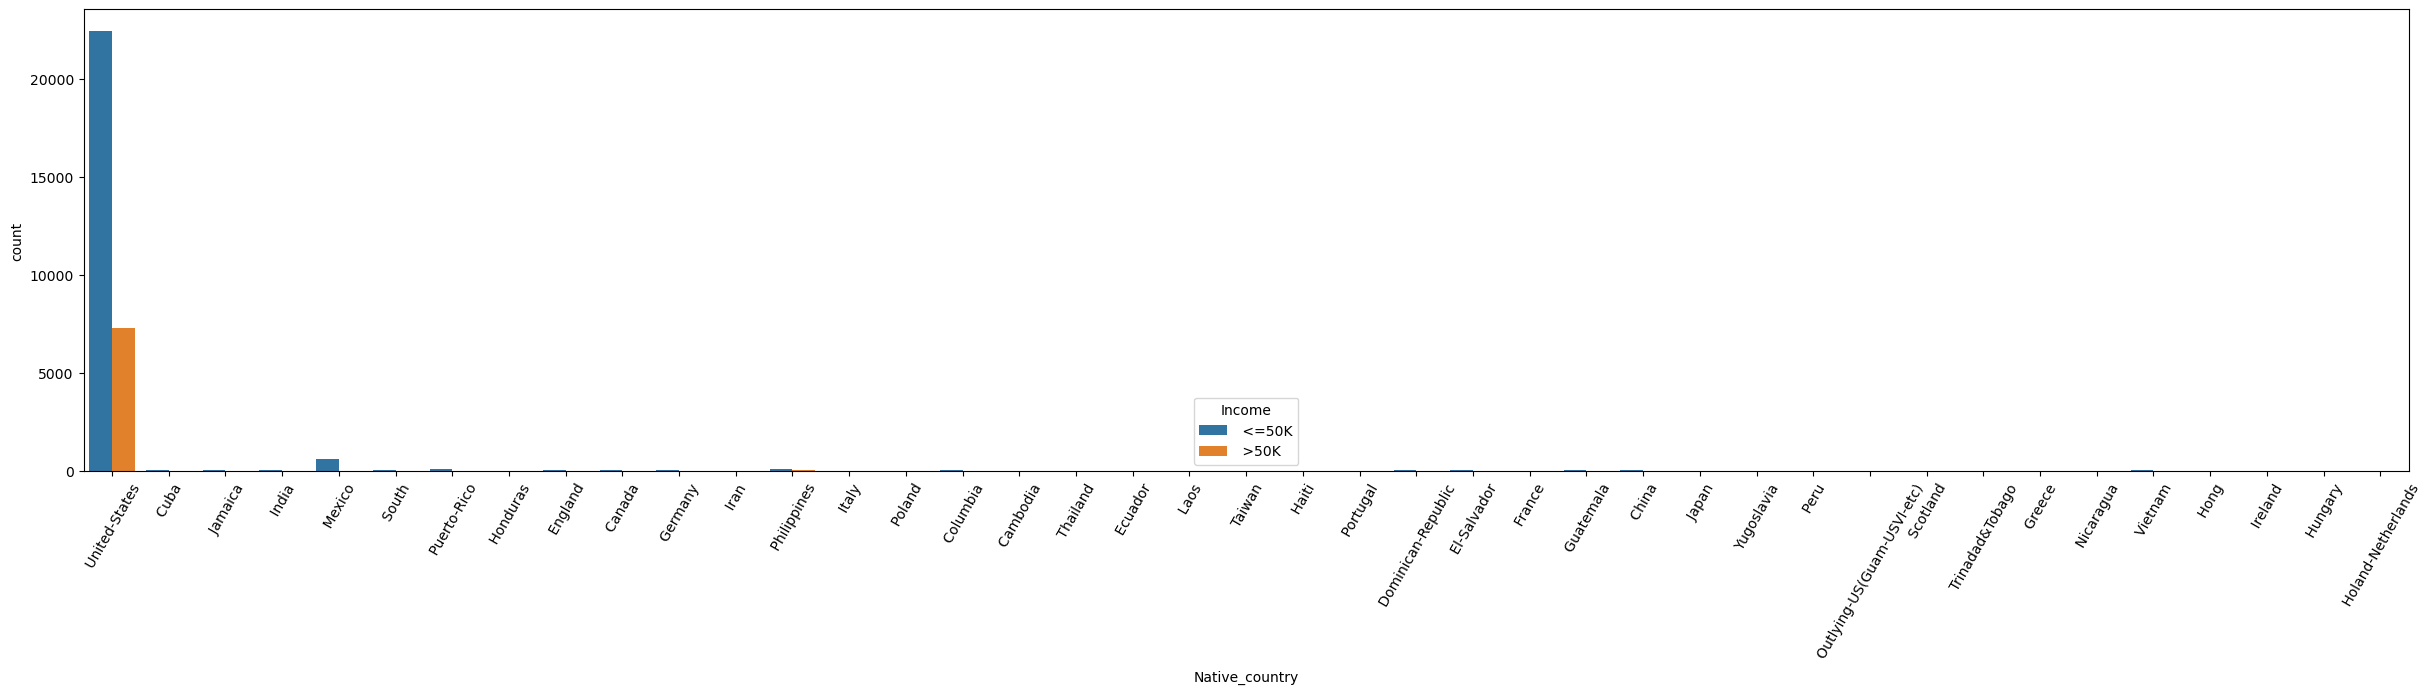

In [47]:
plt.figure(figsize= (30,6))
sns.countplot(x = 'Native_country', hue = 'Income', data = df)
plt.xticks(rotation = 60)
plt.show()

We see that united states has high count for income less than equal to 50 and very few less than 10000 members has income greater than 50k.

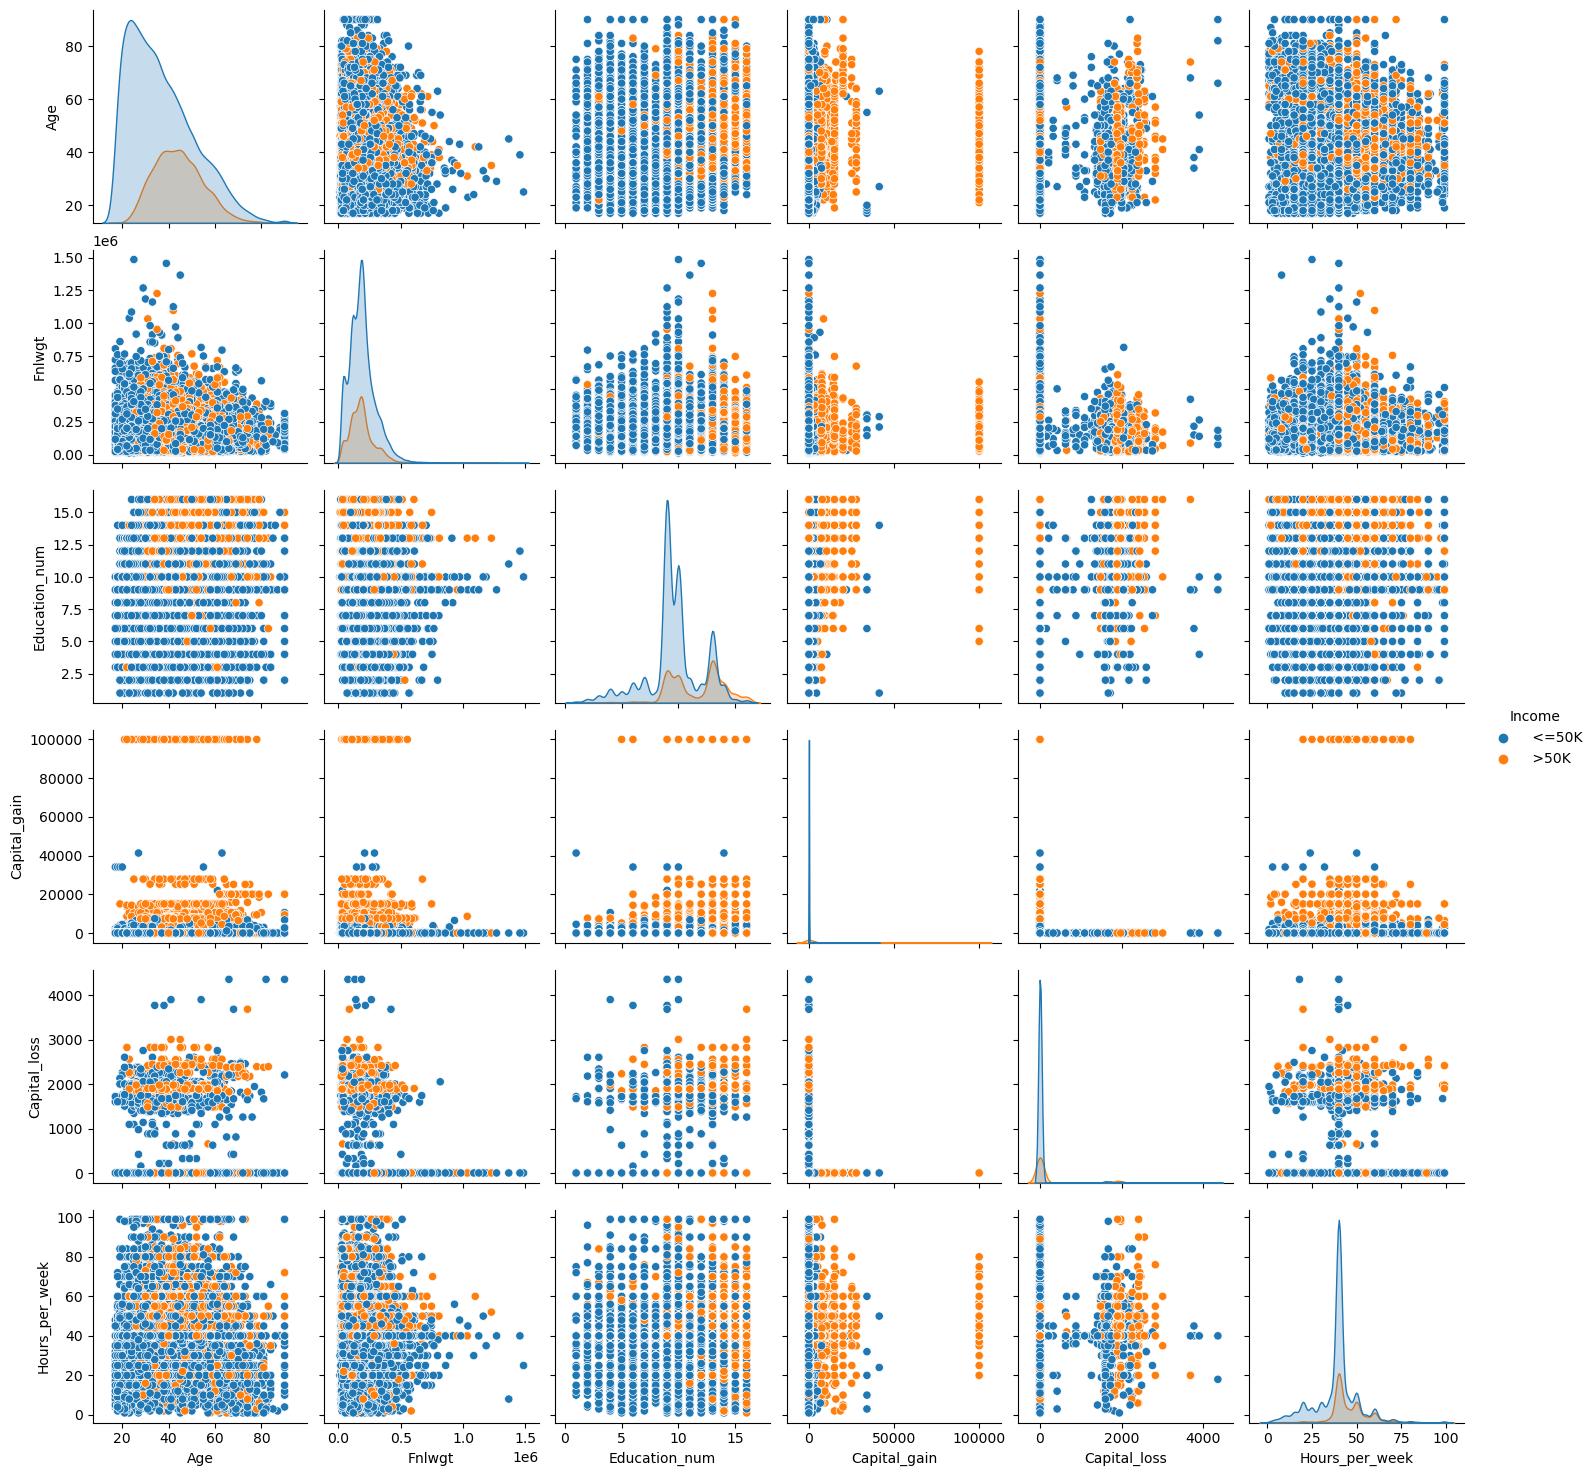

In [48]:
#### Multivariate analysis
sns.pairplot(df,hue = 'Income')

In [49]:
categorical=[]
numerical = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical.append(i)
    else:
        numerical.append(i)
print('Categorical Columns are: ', categorical)
print('Numerical Columns are: ', numerical)

Categorical Columns are:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Numerical Columns are:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


### Outliers

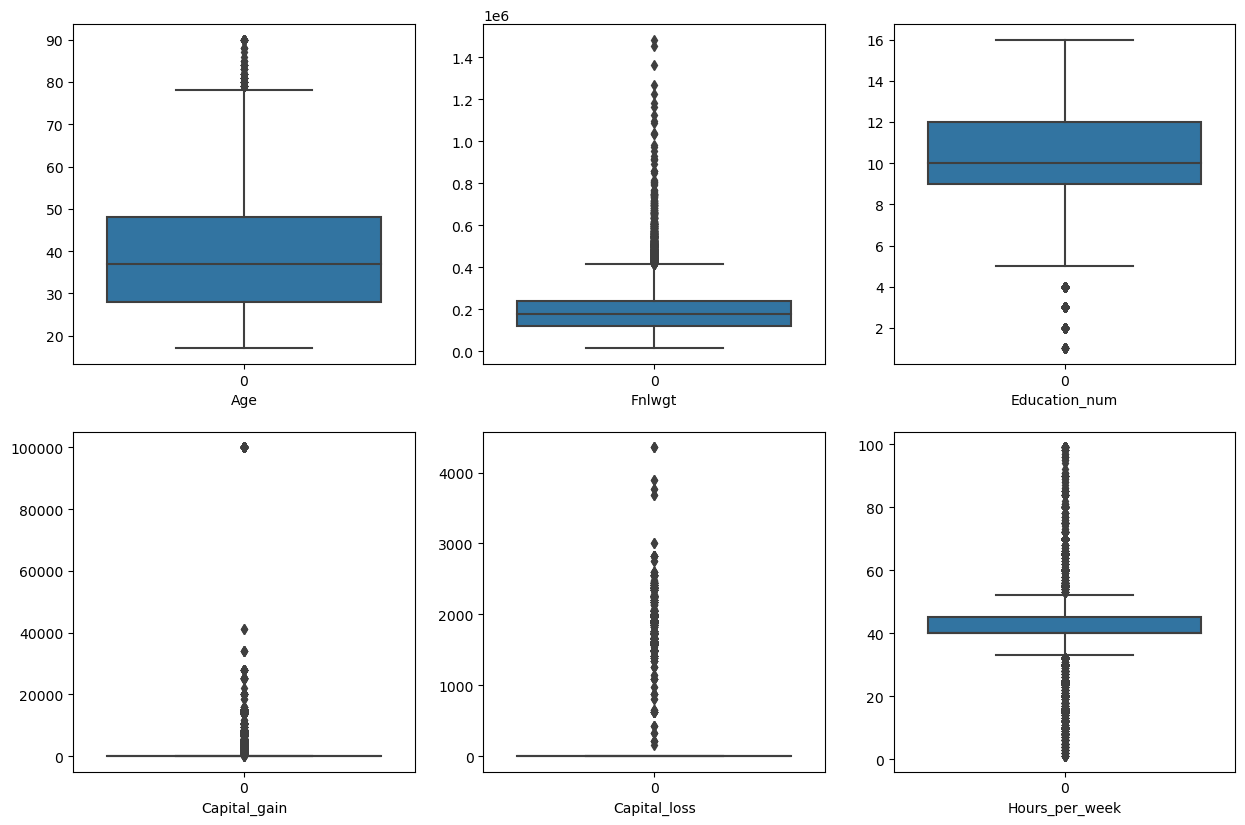

In [50]:
## check by outliers
plt.figure(figsize =(15,15), facecolor = 'white')
num = 1
for column in numerical:
    if num <=9:
        plt.subplot(3,3,num)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()


We see there are outliers in almost all the columns so we will try to remove these outliers using z-score or IQR methods.

In [51]:
outliers = df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]

In [52]:
#using z_score Method
from scipy.stats import zscore
z = np.abs(zscore(outliers))
np.where(z>3) #threshold = 3
z_df=df[(z<3).all(axis=1)]
print(z_df.shape)
print("data_loss =   ", ((df.shape[0]-z_df.shape[0])/df.shape[0])*100)

(29827, 15)
data_loss =    8.393734643734643


In [53]:
#Using Iqr Method
q1 = outliers.quantile(0.25)
q3 = outliers.quantile(0.75)

iqr = q3-q1

iqr_df = df[~((df <(q1 - 1.5*iqr))| (df>(q3+1.5*iqr))).any(axis=1)]
print(iqr_df.shape)
print("data_loss =   ", ((df.shape[0]-iqr_df.shape[0])/df.shape[0])*100)

(18997, 15)
data_loss =    41.6554054054054


We see there is a huge data loss using IQR method i.e., 41%. By z_score method we are losing 8.3% of data. So we consider z_Score method as best method to remove outliers and we consider z_df for next steps..

### Skewness

In [54]:
z_df.skew()

Age                0.491112
Fnlwgt             0.634168
Education_num     -0.170298
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
dtype: float64

We see that Capital_loss is having highest skewness, so its better to drop this feature and try to reduce capital_gains skewness.

In [55]:
z_df.drop('Capital_loss',axis = 1, inplace = True)

In [56]:
z_df['Capital_gain'] = np.sqrt(z_df['Capital_gain'])
z_df.skew()

Age               0.491112
Fnlwgt            0.634168
Education_num    -0.170298
Capital_gain      3.692959
Hours_per_week   -0.354170
dtype: float64

In [57]:
# skewness
from scipy.stats import yeojohnson
z_df['Capital_gain'] = yeojohnson(z_df['Capital_gain'])[0]
z_df.skew()

Age               0.491112
Fnlwgt            0.634168
Education_num    -0.170298
Capital_gain      3.074074
Hours_per_week   -0.354170
dtype: float64

In [58]:
z_df['Fnlwgt'] = yeojohnson(z_df['Fnlwgt'])[0]
z_df.skew()

Age               0.491112
Fnlwgt           -0.034910
Education_num    -0.170298
Capital_gain      3.074074
Hours_per_week   -0.354170
dtype: float64

We see that we could reduce only very less part of skewness for capital_gain, except that all other columns are in range i.e., +/-0.5. Next we will encode categorical data to numerical data. 

In [59]:
z_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,880.135910,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.000000,13,United-States,<=50K
1,38,Private,1479.199865,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.000000,40,United-States,<=50K
2,53,Private,1549.221134,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.000000,40,United-States,<=50K
3,28,Private,1891.488085,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.000000,40,Cuba,<=50K
4,37,Private,1720.909571,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.000000,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,1628.845080,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,-0.000000,38,United-States,<=50K
32556,40,Private,1232.540486,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.000000,40,United-States,>50K
32557,58,Private,1221.763275,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,-0.000000,40,United-States,<=50K
32558,22,Private,1425.395064,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,-0.000000,20,United-States,<=50K


### LabelEncoding

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in z_df.columns:
    if z_df[i].dtypes == 'object':
        z_df[i] = le.fit_transform(z_df[i])
z_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,5,880.135910,8,13,2,3,0,4,1,-0.000000,13,37,0
1,38,3,1479.199865,10,9,0,5,1,4,1,-0.000000,40,37,0
2,53,3,1549.221134,1,7,2,5,0,2,1,-0.000000,40,37,0
3,28,3,1891.488085,8,13,2,9,5,2,0,-0.000000,40,4,0
4,37,3,1720.909571,11,14,2,3,5,4,0,-0.000000,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,1628.845080,6,12,2,12,5,4,0,-0.000000,38,37,0
32556,40,3,1232.540486,10,9,2,6,0,4,1,-0.000000,40,37,1
32557,58,3,1221.763275,10,9,6,0,4,4,0,-0.000000,40,37,0
32558,22,3,1425.395064,10,9,4,0,3,4,1,-0.000000,20,37,0


In [61]:
df = z_df

In [62]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,5,880.135910,8,13,2,3,0,4,1,-0.000000,13,37,0
1,38,3,1479.199865,10,9,0,5,1,4,1,-0.000000,40,37,0
2,53,3,1549.221134,1,7,2,5,0,2,1,-0.000000,40,37,0
3,28,3,1891.488085,8,13,2,9,5,2,0,-0.000000,40,4,0
4,37,3,1720.909571,11,14,2,3,5,4,0,-0.000000,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,1628.845080,6,12,2,12,5,4,0,-0.000000,38,37,0
32556,40,3,1232.540486,10,9,2,6,0,4,1,-0.000000,40,37,1
32557,58,3,1221.763275,10,9,6,0,4,4,0,-0.000000,40,37,0
32558,22,3,1425.395064,10,9,4,0,3,4,1,-0.000000,20,37,0


### Correlation

In [63]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
Age,1.000000,0.033011,-0.067861,-0.004827,0.041426,-0.285664,-0.002601,-0.266795,0.027973,0.086565,0.121432,0.092195,-0.001635,0.239373
Workclass,0.033011,1.000000,-0.023987,0.002705,-0.000664,-0.016131,0.008167,-0.057641,0.045449,0.068847,0.003630,0.027275,-0.001669,-0.007196
Fnlwgt,-0.067861,-0.023987,1.000000,-0.023172,-0.035485,0.028138,-0.002886,0.009961,-0.007601,0.024620,-0.003601,-0.016254,-0.062726,-0.005669
Education,-0.004827,0.002705,-0.023172,1.000000,0.361143,-0.037297,-0.042788,-0.012823,0.015554,-0.027965,0.017704,0.060247,0.071737,0.074586
Education_num,0.041426,-0.000664,-0.035485,0.361143,1.000000,-0.058990,0.069773,-0.096523,0.028547,0.009142,0.105272,0.150517,0.058212,0.318600
Marital_status,-0.285664,-0.016131,0.028138,-0.037297,-0.058990,1.000000,0.035527,0.184776,-0.066197,-0.123321,-0.063995,-0.195285,-0.016976,-0.194458
Occupation,-0.002601,0.008167,-0.002886,-0.042788,0.069773,0.035527,1.000000,-0.036641,-0.003297,0.049840,0.006396,-0.022763,-0.001645,0.030684
Relationship,-0.266795,-0.057641,0.009961,-0.012823,-0.096523,0.184776,-0.036641,1.000000,-0.116297,-0.577083,-0.081186,-0.257918,-0.011042,-0.245894
Race,0.027973,0.045449,-0.007601,0.015554,0.028547,-0.066197,-0.003297,-0.116297,1.000000,0.089770,0.024371,0.045336,0.117186,0.071742
Sex,0.086565,0.068847,0.024620,-0.027965,0.009142,-0.123321,0.049840,-0.577083,0.089770,1.000000,0.064190,0.233912,0.002205,0.209938


In [64]:
df.corr().sum()

Age               1.012593
Workclass         1.081796
Fnlwgt            0.813476
Education         1.454805
Education_num     1.950970
Marital_status    0.190129
Occupation        1.087765
Relationship     -0.565108
Race              1.272535
Sex               1.110660
Capital_gain      1.539534
Hours_per_week    1.427602
Native_country    1.187381
Income            2.001027
dtype: float64

We see all are having positive relation with eachother except "Relationship". Income is having highest correlation with eachother.

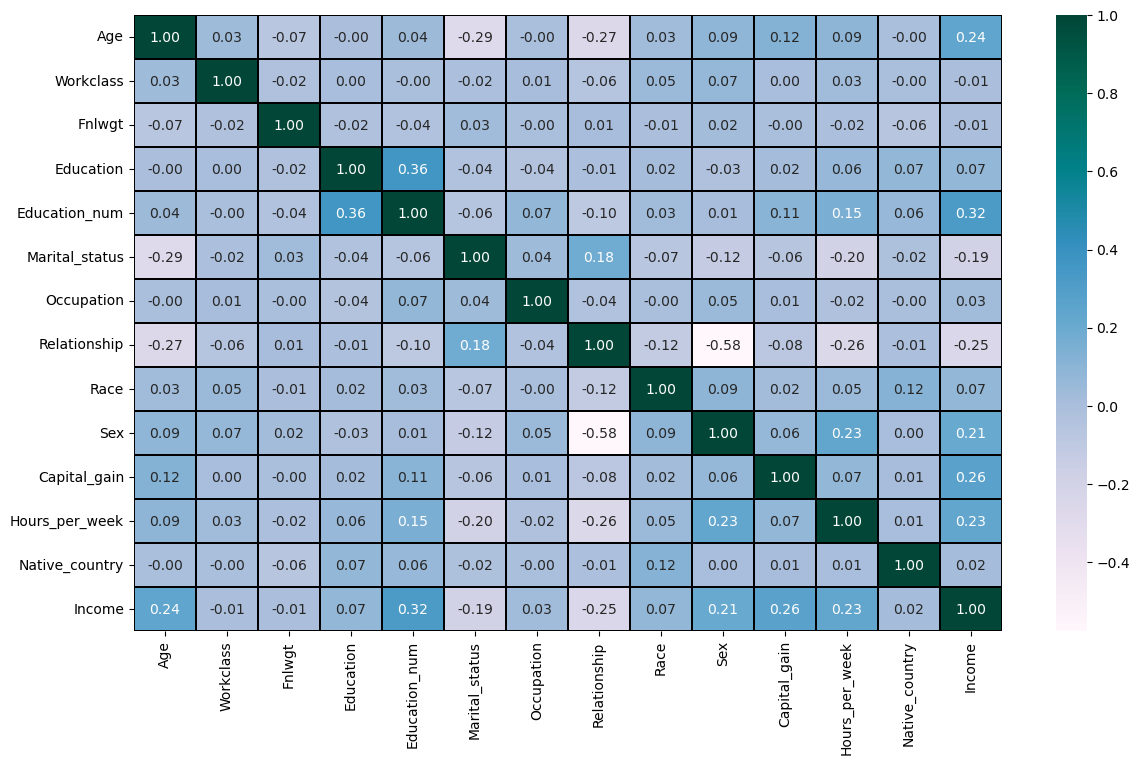

In [65]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '0.2f', linecolor = "Black", annot=True, cmap = "PuBuGn")
plt.show()

We see that Income has positive and also negative correlation with features. It is positively correlated with Age,Education, Education_num,Occupation,Race, Sex, Capital_gain,Hours_per_week and negative correlation with Workclass, Fnlwgt, Marital_status and Relationship.
We dont see any higher correlation among features as well as features with target. The highest among all these features is Education with Education_num and target Income with Education_num.

In [66]:
df.corr()['Income'].sort_values()

Relationship     -0.245894
Marital_status   -0.194458
Workclass        -0.007196
Fnlwgt           -0.005669
Native_country    0.016828
Occupation        0.030684
Race              0.071742
Education         0.074586
Sex               0.209938
Hours_per_week    0.230620
Age               0.239373
Capital_gain      0.261873
Education_num     0.318600
Income            1.000000
Name: Income, dtype: float64

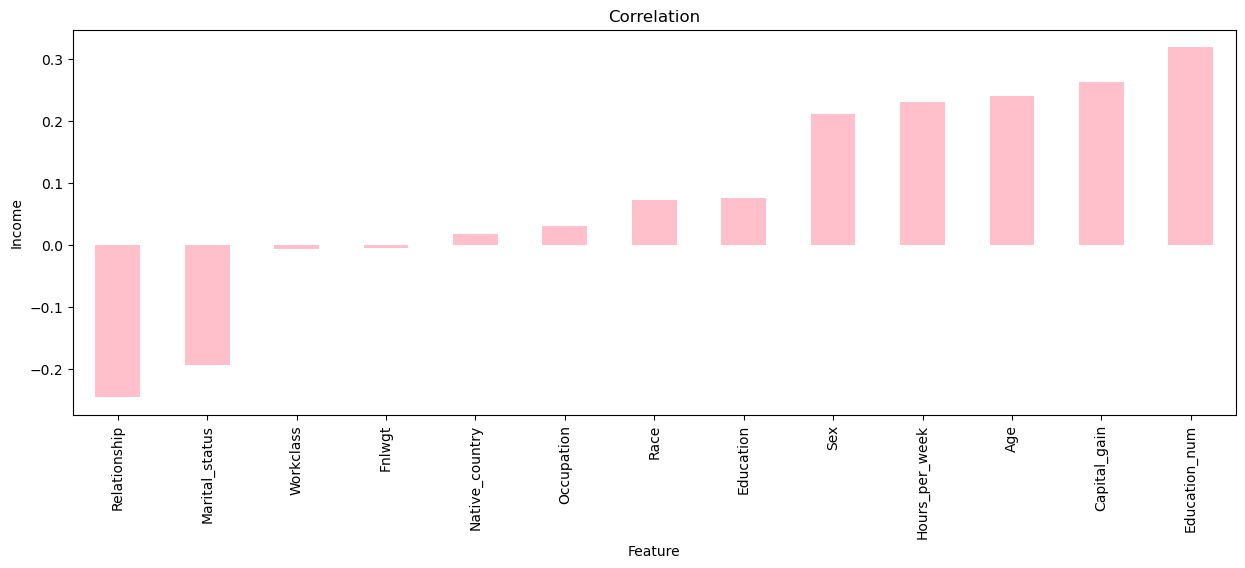

In [67]:
plt.figure(figsize=(15,5))
df.corr()['Income'].sort_values(ascending=True).drop(['Income']).plot(kind='bar',color='pink')
plt.title('Correlation')
plt.xlabel('Feature')
plt.ylabel('Income')
plt.show()

We see that Workclass and fnlwgt are having very least correlation with target Income. Education_num is having highest positive correlation with target Income. 

### Divide Features and Label

In [68]:
x = df.drop(columns = ['Income'], axis = 1)
y = df['Income']

In [69]:
x.shape

(29827, 13)

In [70]:
y.shape

(29827,)

### Standard Scaler

In [71]:
from sklearn.preprocessing import MinMaxScaler

ms=MinMaxScaler()
x = pd.DataFrame(ms.fit_transform(x), columns = x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,0.532258,0.714286,0.278986,0.615385,0.769231,0.333333,0.230769,0.0,1.0,1.0,0.0,0.123288,0.948718
1,0.338710,0.428571,0.571560,0.769231,0.461538,0.000000,0.384615,0.2,1.0,1.0,0.0,0.493151,0.948718
2,0.580645,0.428571,0.605758,0.076923,0.307692,0.333333,0.384615,0.0,0.5,1.0,0.0,0.493151,0.948718
3,0.177419,0.428571,0.772916,0.615385,0.769231,0.333333,0.692308,1.0,0.5,0.0,0.0,0.493151,0.102564
4,0.322581,0.428571,0.689608,0.846154,0.846154,0.333333,0.230769,1.0,1.0,0.0,0.0,0.493151,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29822,0.161290,0.428571,0.644645,0.461538,0.692308,0.333333,0.923077,1.0,1.0,0.0,0.0,0.465753,0.948718
29823,0.370968,0.428571,0.451095,0.769231,0.461538,0.333333,0.461538,0.0,1.0,1.0,0.0,0.493151,0.948718
29824,0.661290,0.428571,0.445832,0.769231,0.461538,1.000000,0.000000,0.8,1.0,0.0,0.0,0.493151,0.948718
29825,0.080645,0.428571,0.545283,0.769231,0.461538,0.666667,0.000000,0.6,1.0,1.0,0.0,0.219178,0.948718


We see the dataset is scaled so, next we will check for multicollinearity.

### Variance Inflation Factor

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,3.803057,Age
1,8.328531,Workclass
2,7.030322,Fnlwgt
3,9.390246,Education
4,10.972594,Education_num
5,4.167000,Marital_status
6,3.335280,Occupation
7,2.752397,Relationship
8,17.725696,Race
9,4.384009,Sex


We see that Education_num, Race, Hours_per_week, Native_country has multicollinearity. So we will drop Native_country and check for multicollinearity. 

In [73]:
x.drop("Native_country",axis = 1, inplace = True)

In [74]:
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,3.689956,Age
1,8.125121,Workclass
2,6.910498,Fnlwgt
3,9.130273,Education
4,10.764372,Education_num
5,4.026755,Marital_status
6,3.307459,Occupation
7,2.613083,Relationship
8,15.077334,Race
9,4.309977,Sex


We see that Still Education_num, Hours_per_week and Race have greater than the actual range. so we consider only Race to be dropped since it has vif higher than hours_per_week and Education_num.

In [75]:
x.drop("Race",axis = 1, inplace = True)

In [76]:
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,3.576011,Age
1,7.735759,Workclass
2,6.666482,Fnlwgt
3,8.957694,Education
4,10.574809,Education_num
5,3.937059,Marital_status
6,3.281551,Occupation
7,2.551378,Relationship
8,4.187890,Sex
9,1.120216,Capital_gain


We see that almost all are in range except education_num and Hours_per_week, but both features vif values are almost to the range 10. so we will not drop any of these features.Next we will split train and ttest the model.

In [77]:
print(y.value_counts())

0    23173
1     6654
Name: Income, dtype: int64


We see that there is a huge imbalance in the dataset. so we need to balance the dataset.

In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [79]:
print(y.value_counts())

0    23173
1    23173
Name: Income, dtype: int64


We see that our dataset is balanced. So next we will build the model.

### Split_Train_Test

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

In [88]:
accuracy = 0
r_state =0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred = log.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>accuracy:
        accuracy=acc
        r_state = i
print("max accuracy score is ", accuracy , "randomstate = ",r_state)

max accuracy score is  0.7689154200230149 randomstate =  90


In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 90)

In [90]:
x_train.shape

(32442, 11)

In [91]:
x_test.shape

(13904, 11)

In [92]:
y_test.shape

(13904,)

In [93]:
y_train.shape

(32442,)

In [94]:
log = LogisticRegression()
log.fit(x_train,y_train)
log_pred = log.predict(x_test)
log_pred_train = log.predict(x_train)
print("Logistic Regression")
print("Accuracy of train data is  ",accuracy_score(y_train, log_pred_train)*100, "%")
log_accu = accuracy_score(y_test, log_pred) 
print("Accuracy of test data is  ", (log_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,log_pred))
print('\n Test Classification Report \n', classification_report(y_test,log_pred))
print("****************************************")
print("\n")

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
rfc_pred_train = rfc.predict(x_train)
print("Random Forest Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, rfc_pred_train)*100, "%")
rfc_accu = accuracy_score(y_test, rfc_pred) 
print("Accuracy of test data is  ", (rfc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,rfc_pred))
print('\n Test Classification Report \n', classification_report(y_test,rfc_pred))
print("****************************************")
print("\n")

bc = BaggingClassifier()
bc.fit(x_train,y_train)
bc_pred = bc.predict(x_test)
bc_pred_train = bc.predict(x_train)
print("Bagging Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, bc_pred_train)*100, "%")
bc_accu = accuracy_score(y_test, bc_pred)
print("Accuracy of test data is  ", (bc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,bc_pred))
print('\n Test Classification Report \n', classification_report(y_test,bc_pred))
print("****************************************")
print("\n")

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred = abc.predict(x_test)
abc_pred_train = abc.predict(x_train)
print("AdaBoost Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, abc_pred_train)*100, "%")
abc_accu = accuracy_score(y_test, abc_pred)
print("Accuracy of test data is  ", (abc_accu) *100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,abc_pred))
print('\n Test Classification Report \n', classification_report(y_test,abc_pred))
print("****************************************")
print("\n")

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
gbc_pred_train = gbc.predict(x_train)
print("Gradient Boosting Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, gbc_pred_train)*100, "%")
gbc_accu = accuracy_score(y_test, gbc_pred) 
print("Accuracy of test data is  ", (gbc_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,gbc_pred))
print('\n Test Classification Report \n', classification_report(y_test,gbc_pred))
print("****************************************")
print("\n")

etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred = etc.predict(x_test)
etc_pred_train = etc.predict(x_train)
print("Extra Trees Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, etc_pred_train)*100, "%")
etc_accu = accuracy_score(y_test, etc_pred) 
print("Accuracy of test data is  ", (etc_accu)*100, "%")
print("\n Confusion Matrix", confusion_matrix(y_test,etc_pred))
print('\n Test Classification Report \n', classification_report(y_test,etc_pred))
print("****************************************")
print("\n")

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
dtc_pred_train = dtc.predict(x_train)
print("Decision Trees Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, dtc_pred_train)*100, "%")
dtc_accu = accuracy_score(y_test, dtc_pred) 
print("Accuracy of test data is  ", (dtc_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,dtc_pred))
print('\n Test Classification Report \n', classification_report(y_test,dtc_pred))
print("****************************************")
print("\n")

knn = KNN()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_pred_train = knn.predict(x_train)
print("K-Nearest Neighbors")
print("Accuracy of train data is  ",accuracy_score(y_train, knn_pred_train)*100, "%")
knn_accu = accuracy_score(y_test, knn_pred) 
print("Accuracy of test data is  ", (knn_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test, knn_pred))
print('\n Test Classification Report \n', classification_report(y_test, knn_pred))
print("****************************************")
print("\n")


svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_pred_train = svc.predict(x_train)
print("Super-Vector Classification")
print("Accuracy of train data is  ",accuracy_score(y_train, svc_pred_train)*100 , "%")
svc_accu = accuracy_score(y_test, svc_pred) 
print("Accuracy of test data is  ", (svc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test, svc_pred))
print('\n Test Classification Report \n', classification_report(y_test, svc_pred))
print("****************************************")
print("\n")


Logistic Regression
Accuracy of train data is   75.8492078170273 %
Accuracy of test data is   76.89154200230149 %

 Confusion Matrix [[5220 1696]
 [1517 5471]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      6916
           1       0.76      0.78      0.77      6988

    accuracy                           0.77     13904
   macro avg       0.77      0.77      0.77     13904
weighted avg       0.77      0.77      0.77     13904

****************************************


Random Forest Classifier
Accuracy of train data is   99.99691757598174 %
Accuracy of test data is   89.36277330264673 %

 Confusion Matrix [[6039  877]
 [ 602 6386]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      6916
           1       0.88      0.91      0.90      6988

    accuracy                           0.89     13904
   macro avg       0.89 

In [95]:
Accuracy = pd.DataFrame({'Models':['Logistic', 'RandomForest Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'GradientBoosting','ExtraTreesClassifier','DecisionTree', 'Knn','svc'],
                          'Accuracy_score':[log_accu, rfc_accu, bc_accu,abc_accu,gbc_accu,etc_accu,dtc_accu,knn_accu,svc_accu]
                        })
Accuracy

,Models,Accuracy_score
0,Logistic,0.768915
1,RandomForest Classifier,0.893628
2,Bagging Classifier,0.881761
3,AdaBoost Classifier,0.843786
4,GradientBoosting,0.866154
5,ExtraTreesClassifier,0.900173
6,DecisionTree,0.852201
7,Knn,0.850906
8,svc,0.823072


We see that most of the models are giving the better score so we will do cross-validation and then check for least difference and build the best model.

### Cross-Validation Score

In [96]:
print('\n Logistic Regression \n')
log_score = cross_val_score(log, x, y, cv=5)
print(log_score)
print(np.mean(log_score))
log_diff = (log_accu - log_score.mean())
print(log_diff)
print("====================================\n ")


print('\n Random Forest Classifier \n')
rfc_score = cross_val_score(rfc, x, y, cv=5)
print(rfc_score)
print(np.mean(rfc_score))
rfc_diff = (rfc_accu - rfc_score.mean())
print(rfc_diff)
print("====================================\n ")


print('\n Bagging Classifier \n')
bc_score = cross_val_score(bc, x, y, cv=5)
print(bc_score)
print(np.mean(bc_score))
bc_diff = (bc_accu - bc_score.mean())
print(bc_diff)
print("====================================\n ")


print('\n AdaBoost Classifier \n')
abc_score = cross_val_score(abc, x, y, cv=5)
print(abc_score)
print(np.mean(abc_score))
abc_diff = (abc_accu - abc_score.mean())
print(abc_diff)
print("====================================\n ")

print('\n Gradient Boosting Classifier \n')
gbc_score = cross_val_score(gbc, x, y, cv=5)
print(gbc_score)
print(np.mean(gbc_score))
gbc_diff = (gbc_accu - gbc_score.mean())
print(gbc_diff)
print("====================================\n ")

print('\n ExtraTrees Classifier \n')
etc_score = cross_val_score(etc, x, y, cv=5)
print(etc_score)
print(np.mean(etc_score))
etc_diff = (etc_accu - etc_score.mean())
print(etc_diff)
print("====================================\n ")

print('\n DecisionTree Classifier \n')
dtc_score = cross_val_score(dtc, x, y, cv=5)
print(dtc_score)
print(np.mean(dtc_score))
dtc_diff = (dtc_accu - dtc_score.mean())
print(dtc_diff)
print("====================================\n ")

print('\n K-Neighbors Classifier \n')
knn_score = cross_val_score(knn, x, y, cv=5)
print(knn_score)
print(np.mean(knn_score))
knn_diff = (knn_accu - knn_score.mean())
print(knn_diff)
print("====================================\n ")

print('\n Super Vector Classifier \n')
svc_score = cross_val_score(svc, x, y, cv=5)
print(svc_score)
print(np.mean(svc_score))
svc_diff = (svc_accu - svc_score.mean())
print(svc_diff)
print("====================================\n ")


 Logistic Regression 

[0.75771305 0.76642572 0.76232603 0.76146294 0.76092351]
0.7617702510939075
0.007145168929107437
 

 Random Forest Classifier 

[0.82966559 0.88693494 0.92232172 0.92739238 0.9232927 ]
0.897921465841236
-0.004293732814768747
 

 Bagging Classifier 

[0.79590076 0.86827058 0.91455389 0.91757471 0.91271982]
0.8818039507874609
-4.33063685886248e-05
 

 AdaBoost Classifier 

[0.8004315  0.83957277 0.85672672 0.85899234 0.85046931]
0.8412385277484203
0.0025474331261481353
 

 Gradient Boosting Classifier 

[0.81316073 0.85467688 0.87625418 0.8785198  0.87301759]
0.8591258353493677
0.00702778950678884
 

 ExtraTrees Classifier 

[0.86375405 0.89998921 0.9232927  0.92987377 0.9240479 ]
0.9081915254278712
-0.008018913229942526
 

 DecisionTree Classifier 

[0.76645092 0.83622829 0.87884346 0.88747438 0.88078541]
0.8499564904322595
0.0022443150913308285
 

 K-Neighbors Classifier 

[0.84487594 0.84766426 0.86514187 0.86319991 0.86373935]
0.85692426635141
-0.0060180523122

In [97]:
CV_data = pd.DataFrame({'Models':['Logistic', 'RandomForest Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'GradientBoosting','ExtraTreesClassifier','DecisionTree', 'Knn','svc'],
                        'Accuracy_score':[log_accu, rfc_accu, bc_accu,abc_accu,gbc_accu,etc_accu,dtc_accu,knn_accu,svc_accu],
                        'Diff_score':[log_diff, rfc_diff, bc_diff,abc_diff,gbc_diff,etc_diff,dtc_diff,knn_diff,svc_diff]
                        })
CV_data

,Models,Accuracy_score,Diff_score
0,Logistic,0.768915,0.007145
1,RandomForest Classifier,0.893628,-0.004294
2,Bagging Classifier,0.881761,-0.000043
3,AdaBoost Classifier,0.843786,0.002547
4,GradientBoosting,0.866154,0.007028
5,ExtraTreesClassifier,0.900173,-0.008019
6,DecisionTree,0.852201,0.002244
7,Knn,0.850906,-0.006018
8,svc,0.823072,0.002656


We see that AdaBoost Classifier and Decision Tree Classifiers are having very least difference between accuracy and CV_score. So, we consider these 2 models and go with hyper parameter tuning so that we can increase the accuracy of the model

### Hyper-parameter Tuning

### AdaBoost Classifier - Hyper Parameter Tuning

In [114]:
param_grid_abc = {"n_estimators":[1,5,10,60],"learning_rate":[0.1,0.01,0.2,0.03], "algorithm":['SAMME','SAMME.R'] }

In [115]:
Census1 = GridSearchCV(AdaBoostClassifier(), param_grid_abc, cv=5)
Census1.fit(x_train,y_train)
best_parameters=Census1.best_params_
print(best_parameters)
best_result=Census1.best_score_
print(best_result*100)

{'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 60}
82.9572862469143


In [132]:
Census1 = AdaBoostClassifier(algorithm= 'SAMME.R',learning_rate=0.2,n_estimators = 270)

In [133]:
Census1.fit(x_train,y_train)
Census1_pred = Census1.predict(x_test)
Census1_accu = accuracy_score(y_test,Census1_pred) * 100
print(f"Accuracy Score of test data is: ",Census1_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,Census1_pred))
print('\n Test Classification Report \n', classification_report(y_test,Census1_pred))

Accuracy Score of test data is:  84.45771001150749 %

 Confusion Matrix [[5641 1275]
 [ 886 6102]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      6916
           1       0.83      0.87      0.85      6988

    accuracy                           0.84     13904
   macro avg       0.85      0.84      0.84     13904
weighted avg       0.85      0.84      0.84     13904



We see that accuracy is 84.31% afer tuning the parameters we checked for different paramters by changing the values of n_estimators but we could not find much difference.

Before Tuning:  84.37%

After Tuning  : 84.45 %

### Decision Tree Classifier

In [98]:
param_grid_dtc = {"criterion":['gini','entropy','log_los'], "max_depth":[10,20,30],
              "max_features":['auto','sqrt','log2'], "random_state":[10,30,40]   
             }

In [99]:
Census2 = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv=5)
Census2.fit(x_train,y_train)
best_parameters=Census2.best_params_
print(best_parameters)
best_result=Census2.best_score_
print(best_result*100)

{'criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'random_state': 40}
84.53856512177775


In [112]:
Census2 = DecisionTreeClassifier(criterion='entropy', max_depth = 200, max_features = 'auto')

In [113]:
Census2.fit(x_train,y_train)
Census2_pred = Census2.predict(x_test)
Census2_accu = accuracy_score(y_test,Census2_pred) * 100
print(f"Accuracy Score of test data is: ",Census2_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,Census2_pred))
print('\n Test Classification Report \n', classification_report(y_test,Census2_pred))

Accuracy Score of test data is:  85.42865362485615 %

 Confusion Matrix [[5870 1046]
 [ 980 6008]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      6916
           1       0.85      0.86      0.86      6988

    accuracy                           0.85     13904
   macro avg       0.85      0.85      0.85     13904
weighted avg       0.85      0.85      0.85     13904



We see that after tuning the parameters there is slight increase in accuracy. We checked with changing the parameters for max_depth which could not increase the performance of the model. So that we compared the models of asda Boost classifie and Decision Trees classifier and considered Decision Trees classifier model as best and accurate model and also its type1 and type2 errors have been reduced.


### Save the model

In [134]:
import joblib
joblib.dump(Census2 ,"census_income_prediction.pkl")

['census_income_prediction.pkl']

In [135]:
census_income_model = joblib.load("census_income_prediction.pkl")
result = census_income_model.score(x_test,y_test)
print(result)

0.8542865362485615


In [136]:
census_income_df = pd.DataFrame({'Actual':y_test , 'Predicted':Census2_pred},columns=['Actual','Predicted'])
census_income_df.sample(25)

,Actual,Predicted
33207,1,1
39251,1,1
7382,0,1
23762,0,1
5355,0,0
37335,1,0
33512,1,0
32014,1,1
15056,0,0
29908,1,1


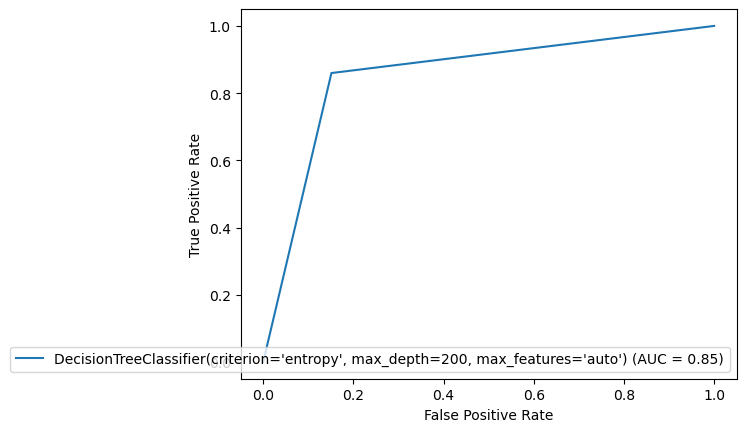

In [137]:
# Plot AUC_ROC curve

from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,Census2_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=Census2)
display.plot()

### So we have saved the model Decision Trees Classifier for predicting Census Income as it is best and accurate models.